In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing inst

In [2]:
""" IMPORTING LIBRARIES """
# EDA and Plotting

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Machine Learning Modules
from xgboost import XGBRegressor as XGB
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression as LinReg, Ridge, Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

# To save and deploy the best ML model

import joblib as jbl
import gradio as gd


# For ignoring warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
?gd

In [6]:
df = pd.read_csv(r"/content/drive/MyDrive/PGA 29 /Adv ML/Model deployment/LaptopPrice_Dataset.csv",index_col=0)
df

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Rating
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1
...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1 Year Onsite Warranty,"₹1,36,990",4.9
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹37,900",3.9
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,"₹1,09,990",3.5
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Manufacturer Warranty on the Device and...,"₹1,22,000",4.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              550 non-null    object 
 1   Processor         550 non-null    object 
 2   RAM               550 non-null    object 
 3   Operating System  550 non-null    object 
 4   Storage           550 non-null    object 
 5   Display           550 non-null    object 
 6   Warranty          550 non-null    object 
 7   Price             550 non-null    object 
 8   Rating            550 non-null    float64
dtypes: float64(1), object(8)
memory usage: 43.0+ KB


In [8]:
df.columns

Index(['Name', 'Processor', 'RAM', 'Operating System', 'Storage', 'Display',
       'Warranty', 'Price', 'Rating'],
      dtype='object')

In [9]:
'''
Name column:
- Here we split the 'Name' column for extracting the brand and
 then the product.
'''
name = df['Name'].str.split(' ', n = 1, expand = True)
name

,0,1
0,Lenovo,Ideapad S145 Core i5 10th Gen - (8 GB/1 TB HDD...
1,Lenovo,IdeaPad Core i3 11th Gen - (8 GB/256 GB SSD/Wi...
2,HP,Pentium Quad Core - (8 GB/256 GB SSD/Windows 1...
3,HP,14s Core i3 11th Gen - (8 GB/256 GB SSD/Window...
4,HP,15s Athlon Dual Core - (4 GB/1 TB HDD/Windows ...
...,...,...
545,ASUS,ASUS TUF Dash Series Core i7 11th Gen - (16 GB...
546,ASUS,Ryzen 3 Dual Core 3250U - (4 GB/256 GB SSD/Win...
547,MSI,GL65 Leopard Core i7 10th Gen - (16 GB/1 TB HD...
548,HP,Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/512...


In [10]:
df["Brand"] = name.iloc[:,0]
df

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Rating,Brand
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9,Lenovo
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2,Lenovo
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6,HP
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1,HP
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1,HP
...,...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1 Year Onsite Warranty,"₹1,36,990",4.9,ASUS
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹37,900",3.9,ASUS
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,"₹1,09,990",3.5,MSI
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Manufacturer Warranty on the Device and...,"₹1,22,000",4.5,HP


In [11]:
df['Product'] = name[1].str.split('Dual Core| Hexa Core| Quad Core| Core',
                                  expand = True)[0]
df

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Rating,Brand,Product
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9,Lenovo,Ideapad S145
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2,Lenovo,IdeaPad
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6,HP,Pentium
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1,HP,14s
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1,HP,15s Athlon
...,...,...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1 Year Onsite Warranty,"₹1,36,990",4.9,ASUS,ASUS TUF Dash Series
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹37,900",3.9,ASUS,Ryzen 3
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,"₹1,09,990",3.5,MSI,GL65 Leopard
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Manufacturer Warranty on the Device and...,"₹1,22,000",4.5,HP,Pavilion


In [12]:
df

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Rating,Brand,Product
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9,Lenovo,Ideapad S145
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2,Lenovo,IdeaPad
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6,HP,Pentium
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1,HP,14s
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1,HP,15s Athlon
...,...,...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1 Year Onsite Warranty,"₹1,36,990",4.9,ASUS,ASUS TUF Dash Series
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹37,900",3.9,ASUS,Ryzen 3
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,"₹1,09,990",3.5,MSI,GL65 Leopard
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Manufacturer Warranty on the Device and...,"₹1,22,000",4.5,HP,Pavilion


In [13]:
'''
    Changing the 'Processor' column:
        - We will first extract the more frequent processor types from the
          Processor column to create a new one;
        - then it will be created a new column with the core type;
        - endly, it will be created a new column informing the processors
          generation.
    '''
prc_type = ['Intel Core i3', 'Intel Core i5', 'Intel Core i7', 'Intel Core i9',
            'AMD Ryzen 3', 'AMD Ryzen 5', 'AMD Ryzen 7', 'AMD Ryzen 9']

df['ProcessorType'] = 'Other'

for k in range(len(df)):
    for i in prc_type:
        if i in str(df['Processor'][k]):
                    df['ProcessorType'][k] = i

In [14]:
df

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Rating,Brand,Product,ProcessorType
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9,Lenovo,Ideapad S145,Intel Core i5
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2,Lenovo,IdeaPad,Intel Core i3
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6,HP,Pentium,Other
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1,HP,14s,Intel Core i3
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1,HP,15s Athlon,Other
...,...,...,...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1 Year Onsite Warranty,"₹1,36,990",4.9,ASUS,ASUS TUF Dash Series,AMD Ryzen 7
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹37,900",3.9,ASUS,Ryzen 3,Intel Core i7
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,"₹1,09,990",3.5,MSI,GL65 Leopard,AMD Ryzen 7
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Manufacturer Warranty on the Device and...,"₹1,22,000",4.5,HP,Pavilion,AMD Ryzen 7


In [15]:
core_type = ['Dual Core', 'Quad Core', 'Hexa Core', 'Octa Core']

df['ProcessorCore'] = 'Core'

for j in range(len(df)):
    for k in core_type:
        if k in str(df['Processor'][j]):
                    df['ProcessorCore'][j] = k

In [16]:
df['ProcessorGen'] = 'Undefined'

for i in range(len(df)):
    for j in range(7,12):
        if str(j)+'th' in (df['Processor'][i]) or str(j)+'th' in (df['Name'][i]):
            df['ProcessorGen'][i] = str(j)+'th'

In [17]:
df.RAM.unique()

array(['8 GB DDR4 RAM', '4 GB DDR4 RAM', '16 GB DDR4 RAM',
       '8 GB LPDDR4X RAM', '8 GB LPDDR3 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR3 RAM', '8 GB DDR3 RAM',
       '16 GB DDR3 RAM', '32 GB DDR4 RAM',
       'Upgradable SSD Upto 512 GB and RAM Upto 32 GB', '4 GB DDR3 RAM',
       '12 GB DDR4 RAM'], dtype=object)

In [18]:
'''
    Rearranging the 'RAM' column by extracting just the number in its entries.
    '''
df['RAM'] = df['RAM'].str.split(' ', expand = True)[0]

df['RAM'] = df['RAM'].astype(int)

ValueError: invalid literal for int() with base 10: 'Upgradable'

In [20]:
'''
    The RAM of the 390th entry was not inserted in its equivalent column. This
    information, 8 GB, is seen in the 'Name' column.
    '''
df['RAM'][df['RAM'] == 'Upgradable'] = 8

df['RAM'] = df['RAM'].astype(int)
df

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Rating,Brand,Product,ProcessorType,ProcessorCore,ProcessorGen
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹43,990",3.9,Lenovo,Ideapad S145,Intel Core i5,Core,10th
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty,"₹43,990",4.2,Lenovo,IdeaPad,Intel Core i3,Core,11th
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹31,490",4.6,HP,Pentium,Other,Quad Core,Undefined
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,"₹40,990",4.1,HP,14s,Intel Core i3,Core,11th
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹27,490",4.1,HP,15s Athlon,Other,Dual Core,Undefined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,"Matrix Display, Dragon Center, Cooler Boost 5,...",1 Year Onsite Warranty,"₹1,36,990",4.9,ASUS,ASUS TUF Dash Series,AMD Ryzen 7,Octa Core,11th
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,"₹37,900",3.9,ASUS,Ryzen 3,Intel Core i7,Core,10th
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4,64 bit Windows 10 Operating System,1 TB HDD|512 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,"₹1,09,990",3.5,MSI,GL65 Leopard,AMD Ryzen 7,Quad Core,10th
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16,Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Manufacturer Warranty on the Device and...,"₹1,22,000",4.5,HP,Pavilion,AMD Ryzen 7,Octa Core,9th


In [21]:
'''
    Operating System Information:
        This attribute will be reduced to three: 'Windows', 'Mac' and 'Other
        OS'. The latter will be used in case the Operating System is not one
        of the formers, dicarding the rest of information of this column.
    '''
df['OpSys'] = ''

for k in range(len(df)):
    if 'Windows' in str(df['Operating System'][k]):
        df['OpSys'][k] = 'windows'
    elif 'Mac' in str(df['Operating System'][k]):
       df['OpSys'][k] = 'Mac'
    else:
       df['OpSys'][k] = 'Other OS'

In [22]:
'''
    Organizing the 'Storage' column:
        - For this step The 'TB' unit will first be replaced by '1000 GB';
        - it will then be extracted just the numeric part of the storage
          information;
        - lastly, this column will be split to differ 'HDD' from 'SSD' storage.
    '''
df['Storage'] = df['Storage'].replace('1 TB', '1000 GB', regex = True)

Storage = df['Storage'].str.split('|', expand = True)

In [23]:
df['HDD Storage'] = ''

df['SSD Storage'] = ''

for j in range(len(Storage)):
    if 'HDD' in str(Storage[0][j]):
        df['HDD Storage'][j] = Storage[0][j]
        df['SSD Storage'][j] = Storage[1][j]
    else:
        df['SSD Storage'][j] = Storage[0][j]
        df['HDD Storage'][j] = Storage[1][j]

In [24]:
df['HDD Storage'] = df['HDD Storage'].str.split('GB', expand = True)[0]

df['HDD Storage'] = df['HDD Storage'].fillna(0).astype(int)

df['SSD Storage'] = df['SSD Storage'].str.split('GB', expand = True)[0]

df['SSD Storage'] = df['SSD Storage'].fillna(0).astype(int)

ValueError: invalid literal for int() with base 10: 'M.2 Slot for SSD Upgrade'

In [25]:
df['SSD Storage'].unique()

array([None, '256 ', '512 ', '1000 ', 'M.2 Slot for SSD Upgrade', '128 '],
      dtype=object)

In [26]:
'''
    The storage of the 201st entry was not properly iserted. The correct value,
    1 TB (1000 GB), was taken from the 'Name' column.
    '''
df['SSD Storage'][df['SSD Storage'] == 'M.2 Slot for SSD Upgrade'] = 1000

df['SSD Storage'] = df['SSD Storage'].fillna(0).astype(int)

In [27]:
'''
   Display column:
        - We first replace the records with the Display lenght in 'inch'  to
          'cm';
        - the Display information not recorder in 'cm' is replaced by 'other';
        - ultimately, the rest of information is discarded, by splitting the
        Display column by 'cm'.
    '''
df['Display'] = df['Display'].replace('15.6 inches', '39.62 cm', regex = True)

for i in range(len(df)):
            if 'cm' not in str(df['Display'][i]):
                    df['Display'][i] = 'Other'

In [29]:
df['Display'] = df['Display'].str.split('cm', expand = True)[0]
df

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Rating,Brand,Product,ProcessorType,ProcessorCore,ProcessorGen,OpSys,HDD Storage,SSD Storage
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1000 GB HDD,39.62,1 Year Onsite Warranty,"₹43,990",3.9,Lenovo,Ideapad S145,Intel Core i5,Core,10th,windows,1000,0
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56,1 Year Onsite Warranty,"₹43,990",4.2,Lenovo,IdeaPad,Intel Core i3,Core,11th,windows,0,256
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,35.56,1 Year Onsite Warranty,"₹31,490",4.6,HP,Pentium,Other,Quad Core,Undefined,windows,0,256
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56,1 Year Onsite Warranty,"₹40,990",4.1,HP,14s,Intel Core i3,Core,11th,windows,0,256
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,64 bit Windows 10 Operating System,1000 GB HDD,39.62,1 Year Onsite Warranty,"₹27,490",4.1,HP,15s Athlon,Other,Dual Core,Undefined,windows,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,Other,1 Year Onsite Warranty,"₹1,36,990",4.9,ASUS,ASUS TUF Dash Series,AMD Ryzen 7,Octa Core,11th,windows,0,256
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16,64 bit Windows 10 Operating System,1000 GB HDD|256 GB SSD,35.56,1 Year Onsite Warranty,"₹37,900",3.9,ASUS,Ryzen 3,Intel Core i7,Core,10th,windows,1000,256
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4,64 bit Windows 10 Operating System,1000 GB HDD|512 GB SSD,33.78,1 Year Onsite Warranty,"₹1,09,990",3.5,MSI,GL65 Leopard,AMD Ryzen 7,Quad Core,10th,windows,1000,512
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16,Windows 10 Operating System,512 GB SSD,39.62,1 Year Manufacturer Warranty on the Device and...,"₹1,22,000",4.5,HP,Pavilion,AMD Ryzen 7,Octa Core,9th,windows,0,512


In [30]:
'''
     Warranty column:
          - for this step, we simply split the term 'Year' and 'Months',
          discarding the rest of information.
      '''
df['Warranty'] = df['Warranty'].replace('One-year', '1 Year', regex = True)

for i in range(len(df)):
    if 'Months' in str(df['Warranty'][i][:9]):
        df['Warranty'][i] = str(float(str(df['Warranty'][i])[:2])/12)+ ' Year'
    elif 'Year' not in str(df['Warranty'][i][:7]):
        df['Warranty'][i] = 'Other'

In [31]:
df['Warranty'] = df['Warranty'].str.split('Year', expand = True)[0]
df

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Rating,Brand,Product,ProcessorType,ProcessorCore,ProcessorGen,OpSys,HDD Storage,SSD Storage
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1000 GB HDD,39.62,1,"₹43,990",3.9,Lenovo,Ideapad S145,Intel Core i5,Core,10th,windows,1000,0
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56,1,"₹43,990",4.2,Lenovo,IdeaPad,Intel Core i3,Core,11th,windows,0,256
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,35.56,1,"₹31,490",4.6,HP,Pentium,Other,Quad Core,Undefined,windows,0,256
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56,1,"₹40,990",4.1,HP,14s,Intel Core i3,Core,11th,windows,0,256
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,64 bit Windows 10 Operating System,1000 GB HDD,39.62,1,"₹27,490",4.1,HP,15s Athlon,Other,Dual Core,Undefined,windows,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,Other,1,"₹1,36,990",4.9,ASUS,ASUS TUF Dash Series,AMD Ryzen 7,Octa Core,11th,windows,0,256
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16,64 bit Windows 10 Operating System,1000 GB HDD|256 GB SSD,35.56,1,"₹37,900",3.9,ASUS,Ryzen 3,Intel Core i7,Core,10th,windows,1000,256
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4,64 bit Windows 10 Operating System,1000 GB HDD|512 GB SSD,33.78,1,"₹1,09,990",3.5,MSI,GL65 Leopard,AMD Ryzen 7,Quad Core,10th,windows,1000,512
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16,Windows 10 Operating System,512 GB SSD,39.62,1,"₹1,22,000",4.5,HP,Pavilion,AMD Ryzen 7,Octa Core,9th,windows,0,512


In [32]:
df.Warranty.unique()

array(['1 ', '2 ', '2.0 ', '1.5 ', '3 ', 'Other'], dtype=object)

In [33]:
for i in range(len(df)):
    if df['Warranty'][i] != 'Other':
       df['Warranty'][i] =  df['Warranty'][i] + ' Year'

In [34]:
df

,Name,Processor,RAM,Operating System,Storage,Display,Warranty,Price,Rating,Brand,Product,ProcessorType,ProcessorCore,ProcessorGen,OpSys,HDD Storage,SSD Storage
0,Lenovo Ideapad S145 Core i5 10th Gen - (8 GB/1...,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,1000 GB HDD,39.62,1 Year,"₹43,990",3.9,Lenovo,Ideapad S145,Intel Core i5,Core,10th,windows,1000,0
1,Lenovo IdeaPad Core i3 11th Gen - (8 GB/256 GB...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56,1 Year,"₹43,990",4.2,Lenovo,IdeaPad,Intel Core i3,Core,11th,windows,0,256
2,HP Pentium Quad Core - (8 GB/256 GB SSD/Window...,Intel Pentium Quad Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,35.56,1 Year,"₹31,490",4.6,HP,Pentium,Other,Quad Core,Undefined,windows,0,256
3,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,Intel Core i3 Processor (11th Gen),8,64 bit Windows 10 Operating System,256 GB SSD,35.56,1 Year,"₹40,990",4.1,HP,14s,Intel Core i3,Core,11th,windows,0,256
4,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,AMD Athlon Dual Core Processor,4,64 bit Windows 10 Operating System,1000 GB HDD,39.62,1 Year,"₹27,490",4.1,HP,15s Athlon,Other,Dual Core,Undefined,windows,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ASUS ASUS TUF Dash Series Core i7 11th Gen - (...,AMD Ryzen 7 Octa Core Processor,8,64 bit Windows 10 Operating System,256 GB SSD,Other,1 Year,"₹1,36,990",4.9,ASUS,ASUS TUF Dash Series,AMD Ryzen 7,Octa Core,11th,windows,0,256
546,ASUS Ryzen 3 Dual Core 3250U - (4 GB/256 GB SS...,Intel Core i7 Processor (10th Gen),16,64 bit Windows 10 Operating System,1000 GB HDD|256 GB SSD,35.56,1 Year,"₹37,900",3.9,ASUS,Ryzen 3,Intel Core i7,Core,10th,windows,1000,256
547,MSI GL65 Leopard Core i7 10th Gen - (16 GB/1 T...,AMD Ryzen 7 Quad Core Processor,4,64 bit Windows 10 Operating System,1000 GB HDD|512 GB SSD,33.78,1 Year,"₹1,09,990",3.5,MSI,GL65 Leopard,AMD Ryzen 7,Quad Core,10th,windows,1000,512
548,HP Pavilion Core i7 9th Gen - (12 GB/1 TB HDD/...,AMD Ryzen 7 Octa Core Processor,16,Windows 10 Operating System,512 GB SSD,39.62,1 Year,"₹1,22,000",4.5,HP,Pavilion,AMD Ryzen 7,Octa Core,9th,windows,0,512


In [35]:
'''
    Organizing the 'Price' column:
        - On the following code, we replace the '₹' currency symbol
          and, lastly, ',' to white space.
    '''
df['Price'] = df['Price'].replace(['₹', ','], '', regex = True).astype(float)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 549
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              550 non-null    object 
 1   Processor         550 non-null    object 
 2   RAM               550 non-null    int64  
 3   Operating System  550 non-null    object 
 4   Storage           550 non-null    object 
 5   Display           550 non-null    object 
 6   Warranty          550 non-null    object 
 7   Price             550 non-null    float64
 8   Rating            550 non-null    float64
 9   Brand             550 non-null    object 
 10  Product           550 non-null    object 
 11  ProcessorType     550 non-null    object 
 12  ProcessorCore     550 non-null    object 
 13  ProcessorGen      550 non-null    object 
 14  OpSys             550 non-null    object 
 15  HDD Storage       550 non-null    int64  
 16  SSD Storage       550 non-null    int64  
dtypes:

In [39]:
'''
    Concatenating the clean data in a new dataset.
    '''
df_ltp = pd.concat([df['Brand'], df['Product'], df['ProcessorType'],
                  df['ProcessorCore'], df['ProcessorGen'], df['RAM'],
                  df['OpSys'], df['HDD Storage'], df['SSD Storage'],
                  df['Display'], df['Warranty'], df['Rating'], df['Price']],
                 axis = 1)

In [40]:
df_ltp

,Brand,Product,ProcessorType,ProcessorCore,ProcessorGen,RAM,OpSys,HDD Storage,SSD Storage,Display,Warranty,Rating,Price
0,Lenovo,Ideapad S145,Intel Core i5,Core,10th,8,windows,1000,0,39.62,1 Year,3.9,43990.0
1,Lenovo,IdeaPad,Intel Core i3,Core,11th,8,windows,0,256,35.56,1 Year,4.2,43990.0
2,HP,Pentium,Other,Quad Core,Undefined,8,windows,0,256,35.56,1 Year,4.6,31490.0
3,HP,14s,Intel Core i3,Core,11th,8,windows,0,256,35.56,1 Year,4.1,40990.0
4,HP,15s Athlon,Other,Dual Core,Undefined,4,windows,1000,0,39.62,1 Year,4.1,27490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,ASUS,ASUS TUF Dash Series,AMD Ryzen 7,Octa Core,11th,8,windows,0,256,Other,1 Year,4.9,136990.0
546,ASUS,Ryzen 3,Intel Core i7,Core,10th,16,windows,1000,256,35.56,1 Year,3.9,37900.0
547,MSI,GL65 Leopard,AMD Ryzen 7,Quad Core,10th,4,windows,1000,512,33.78,1 Year,3.5,109990.0
548,HP,Pavilion,AMD Ryzen 7,Octa Core,9th,16,windows,0,512,39.62,1 Year,4.5,122000.0


In [41]:
df_ltp.describe()['Price']

,Price
count,550.000000
mean,81364.138182
std,45119.284969
min,17990.000000
25%,46990.000000
50%,65990.000000
75%,107990.000000
max,338990.000000


In [43]:
df_ltp.describe(include="all")

,Brand,Product,ProcessorType,ProcessorCore,ProcessorGen,RAM,OpSys,HDD Storage,SSD Storage,Display,Warranty,Rating,Price
count,550,550,550,550,550,550.000000,550,550.000000,550.000000,550,550,550.000000,550.000000
unique,14,223,9,5,6,NaN,3,NaN,NaN,16,6,NaN,NaN
top,Lenovo,IdeaPad,Intel Core i5,Core,10th,NaN,windows,NaN,NaN,39.62,1 Year,NaN,NaN
freq,144,41,217,450,251,NaN,525,NaN,NaN,258,460,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,10.087273,NaN,353.658182,393.760000,NaN,NaN,4.281455,81364.138182
std,NaN,NaN,NaN,NaN,NaN,4.957343,NaN,478.064144,277.548546,NaN,NaN,0.703557,45119.284969
min,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,0.000000,0.000000,NaN,NaN,1.000000,17990.000000
25%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,0.000000,256.000000,NaN,NaN,4.000000,46990.000000
50%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,0.000000,512.000000,NaN,NaN,4.400000,65990.000000
75%,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,1000.000000,512.000000,NaN,NaN,4.600000,107990.000000


In [44]:
'''
     Presenting the entries overall information, such as type and missing
     values. As can be noticed by running the code below, at this point,
     everything seems right.
     '''
df_ltp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 550 entries, 0 to 549
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          550 non-null    object 
 1   Product        550 non-null    object 
 2   ProcessorType  550 non-null    object 
 3   ProcessorCore  550 non-null    object 
 4   ProcessorGen   550 non-null    object 
 5   RAM            550 non-null    int64  
 6   OpSys          550 non-null    object 
 7   HDD Storage    550 non-null    int64  
 8   SSD Storage    550 non-null    int64  
 9   Display        550 non-null    object 
 10  Warranty       550 non-null    object 
 11  Rating         550 non-null    float64
 12  Price          550 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 76.3+ KB


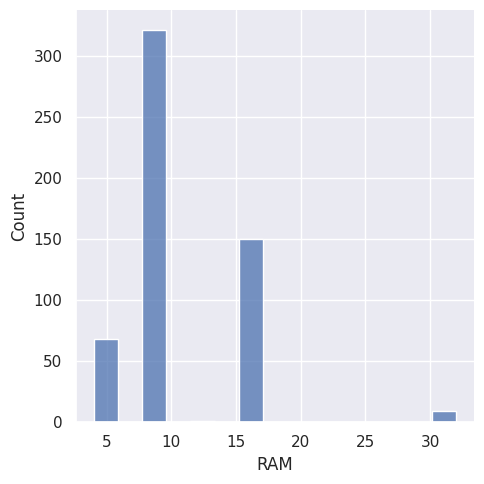

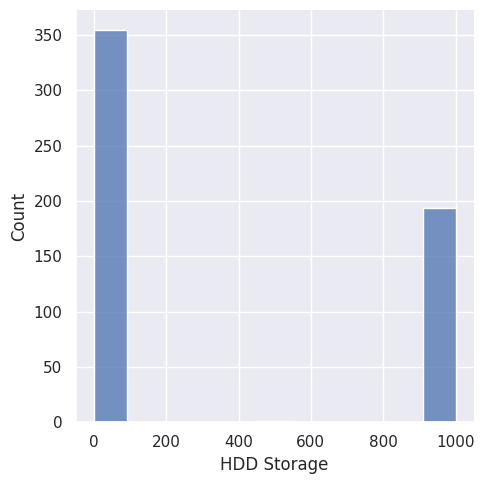

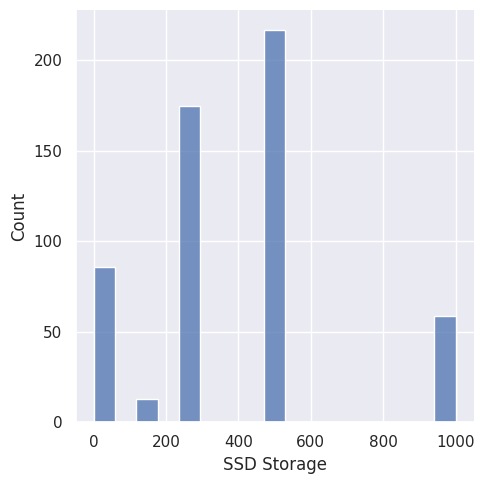

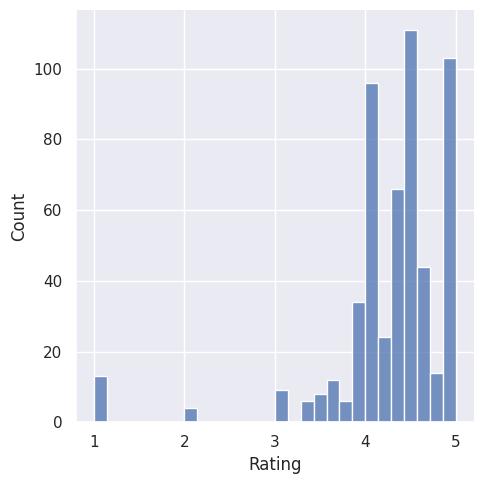

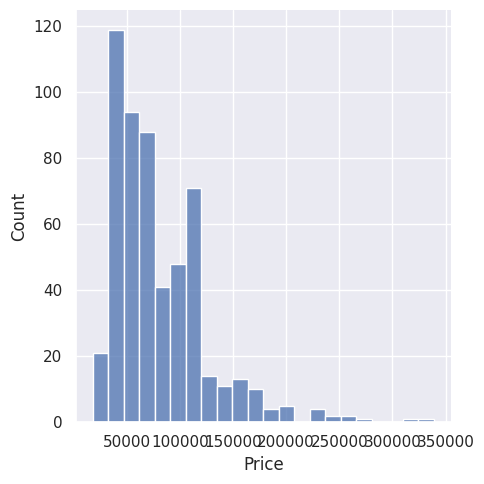

In [45]:
numeric_vls = list(df_ltp.describe().columns)

for i in numeric_vls:
    sns.set(rc = {'figure.figsize':(20,10)}, font_scale = 1)
    sns.displot(df_ltp[i])
    #plt.savefig ('{0}_displot.png'.format(i))
    plt.show()

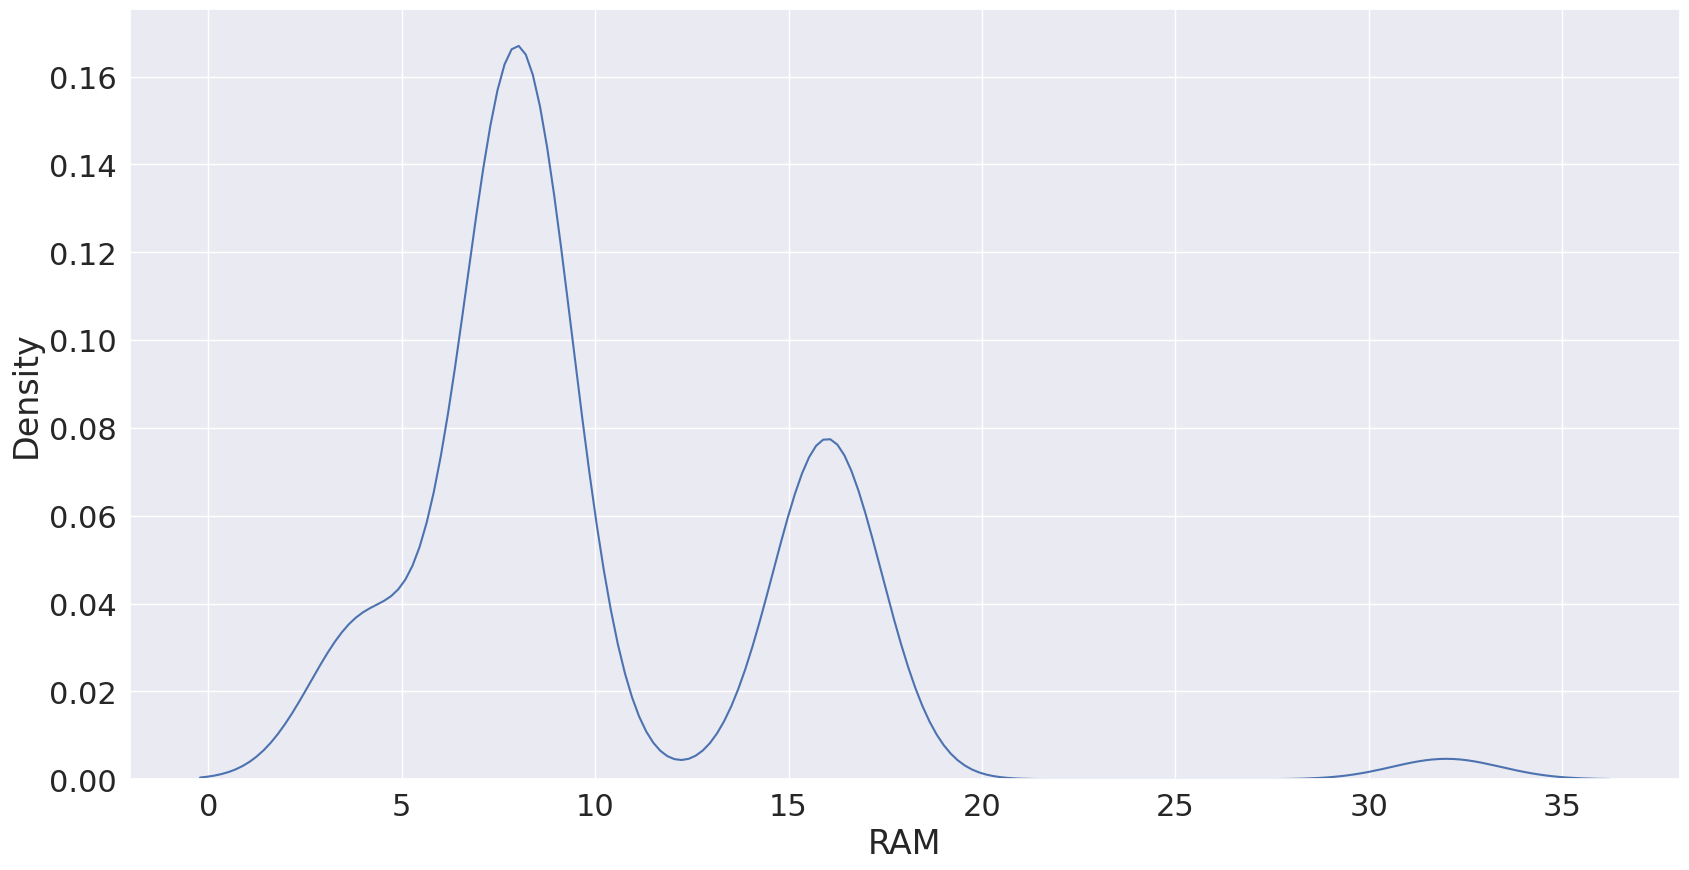

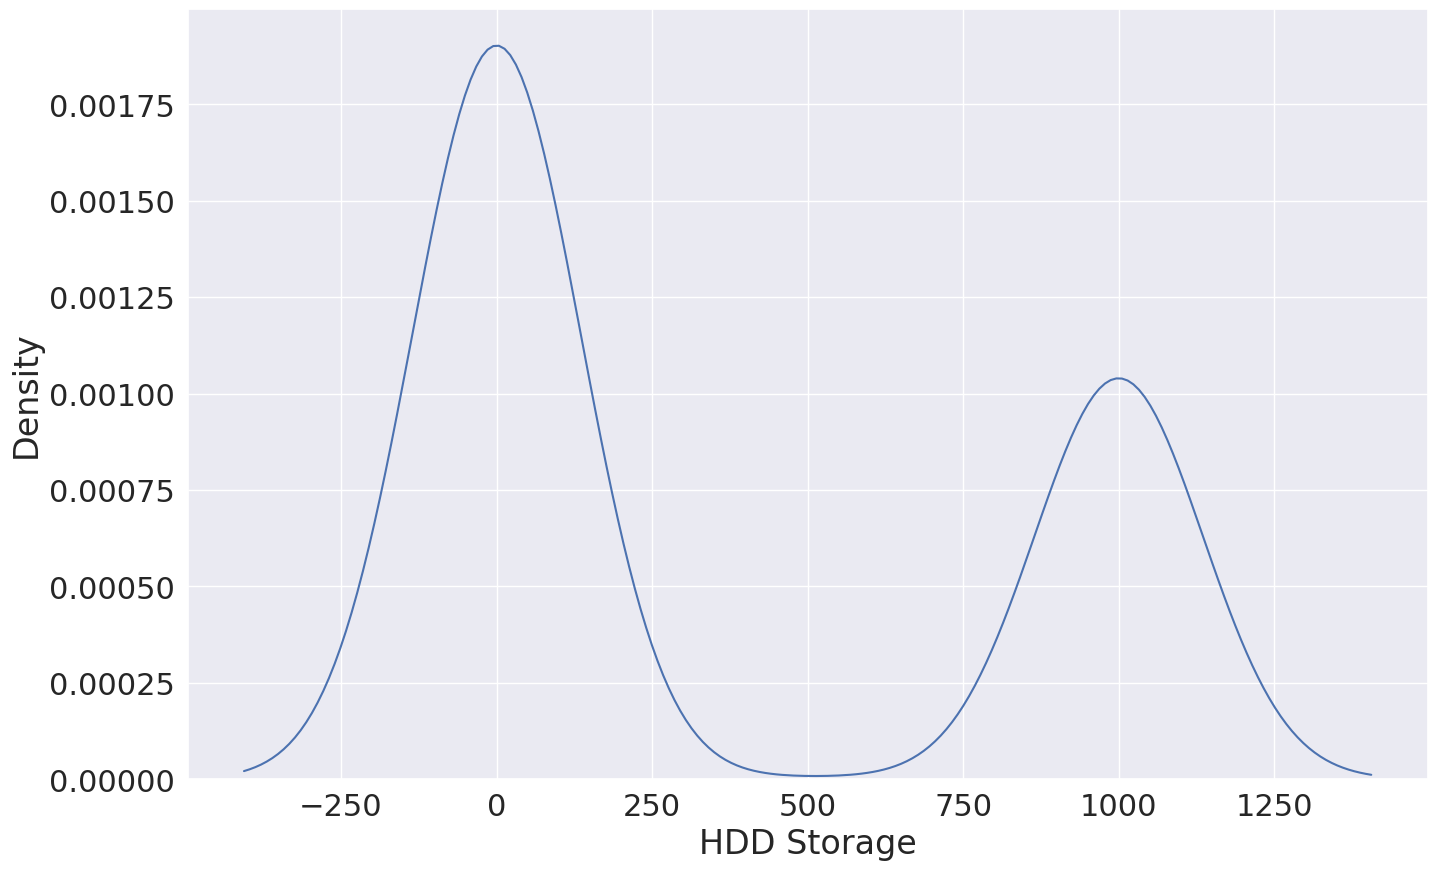

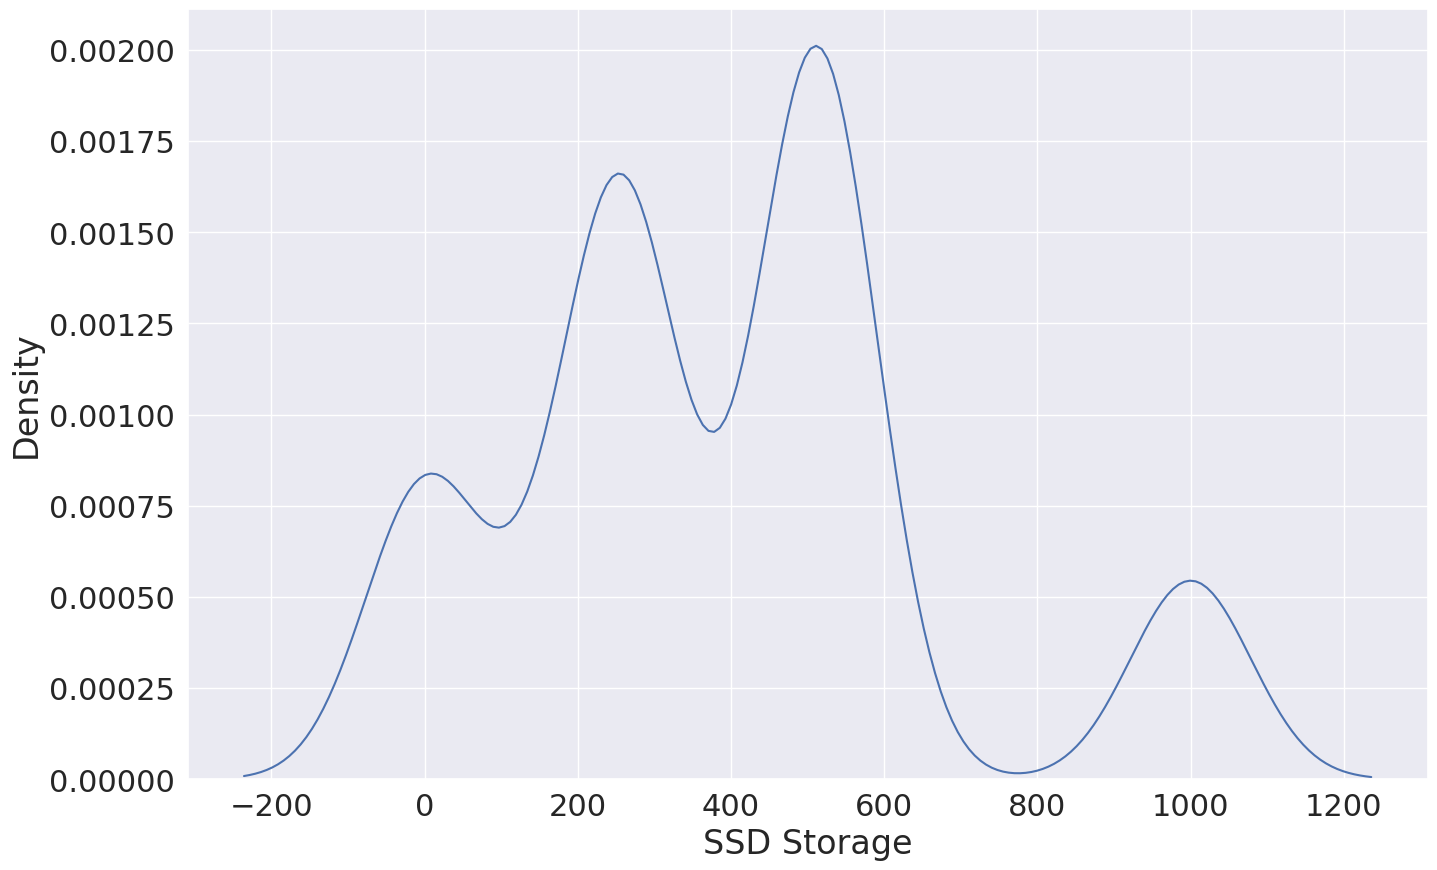

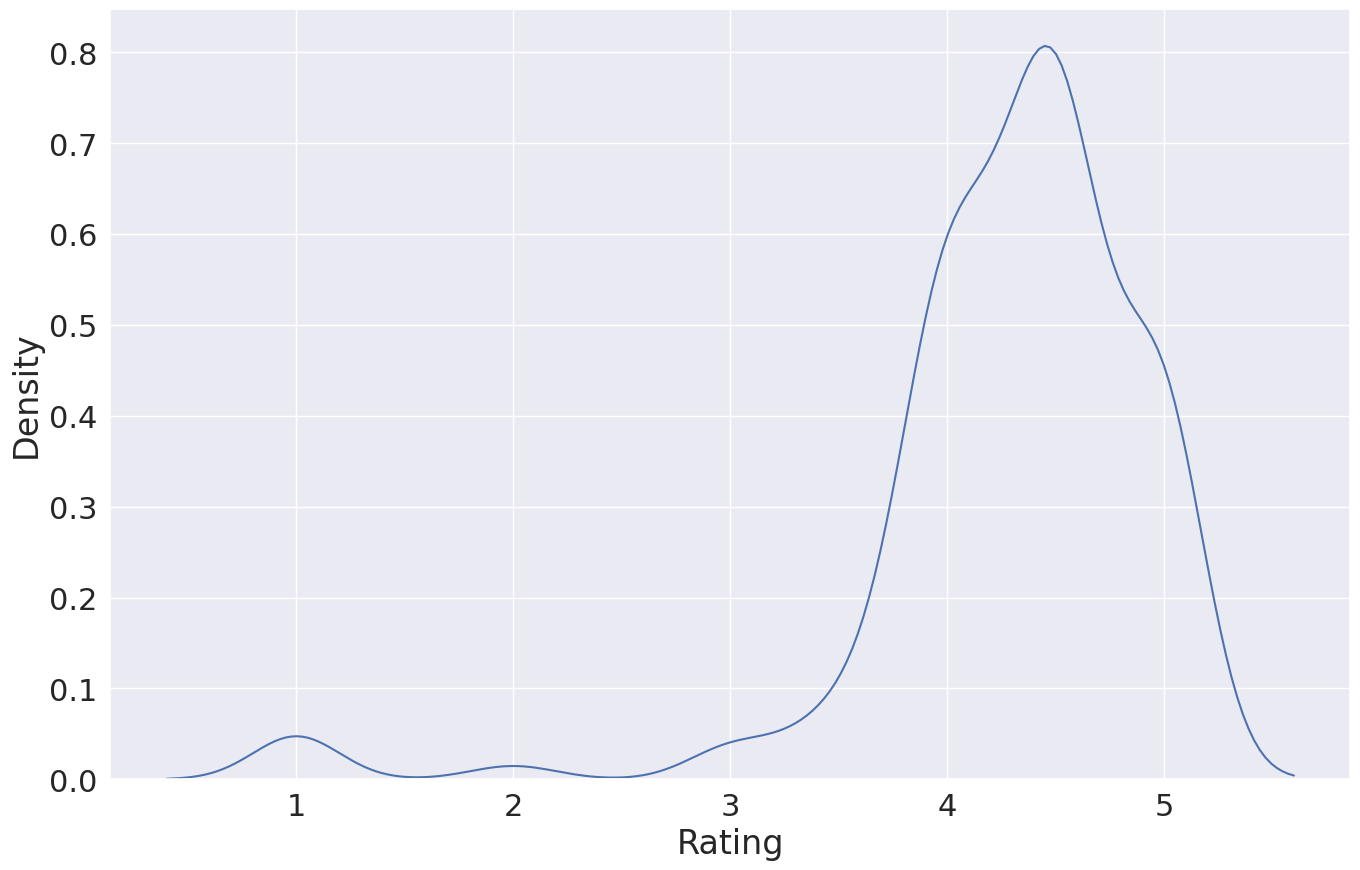

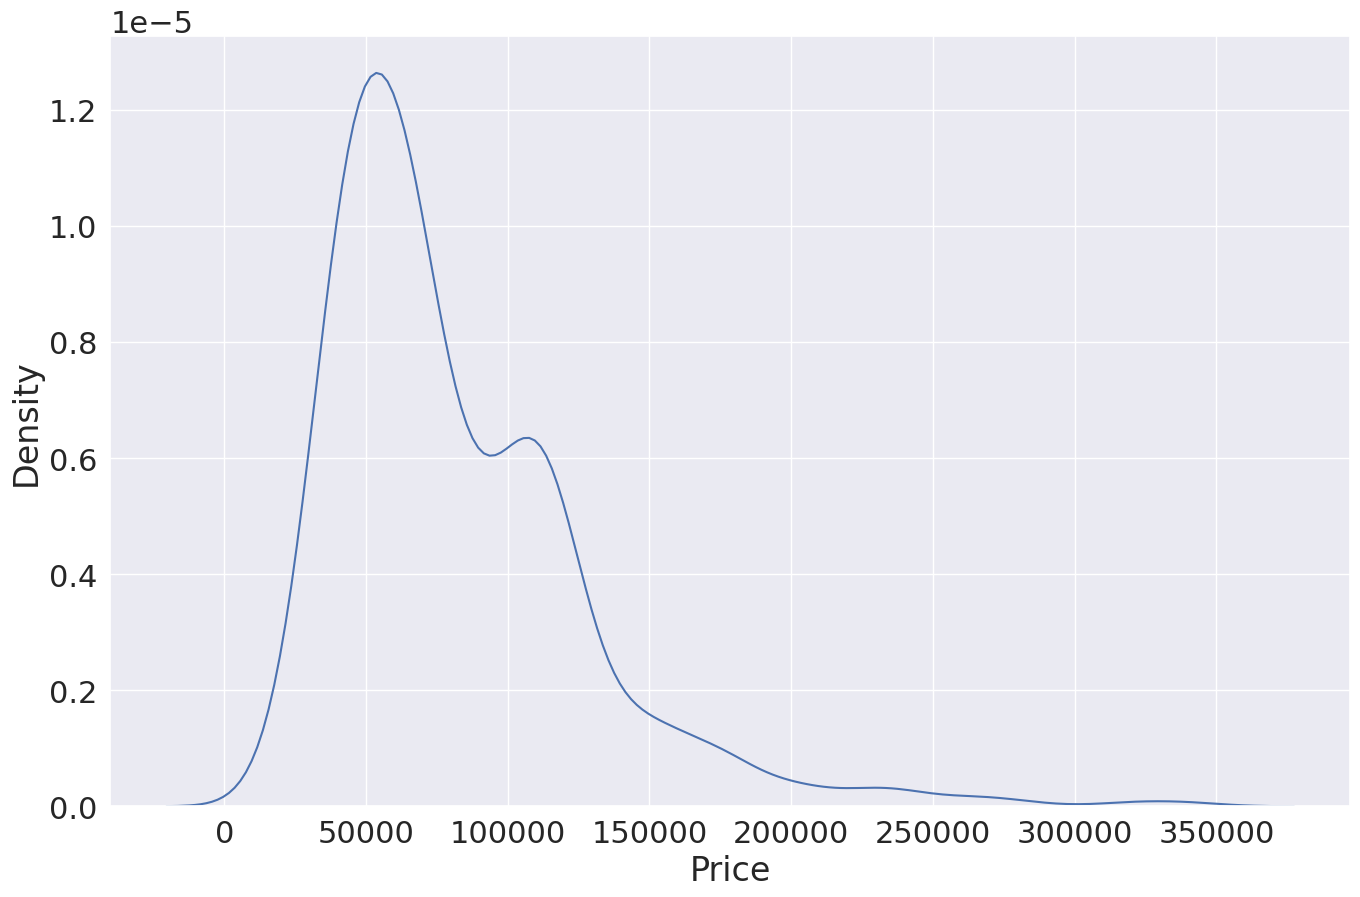

In [46]:
for j in numeric_vls:
    plt.figure()
    sns.set(rc = {'figure.figsize':(16,10)}, font_scale = 2)
    sns.kdeplot(df_ltp[j])
    #plt.savefig ('{0}_kdeplot.png'.format(j))
    plt.show()

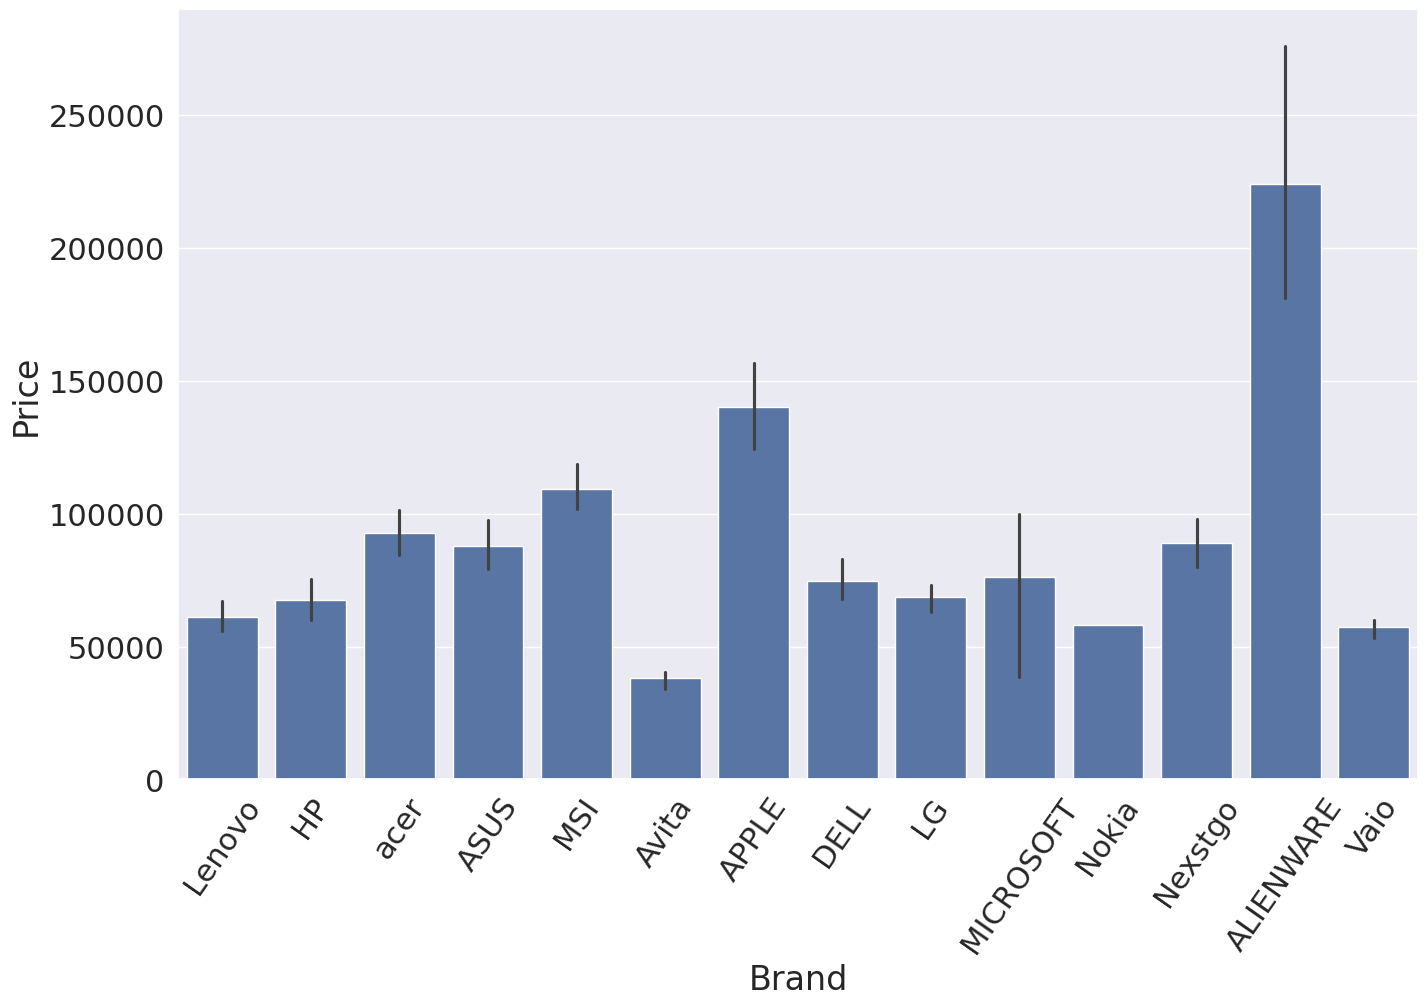

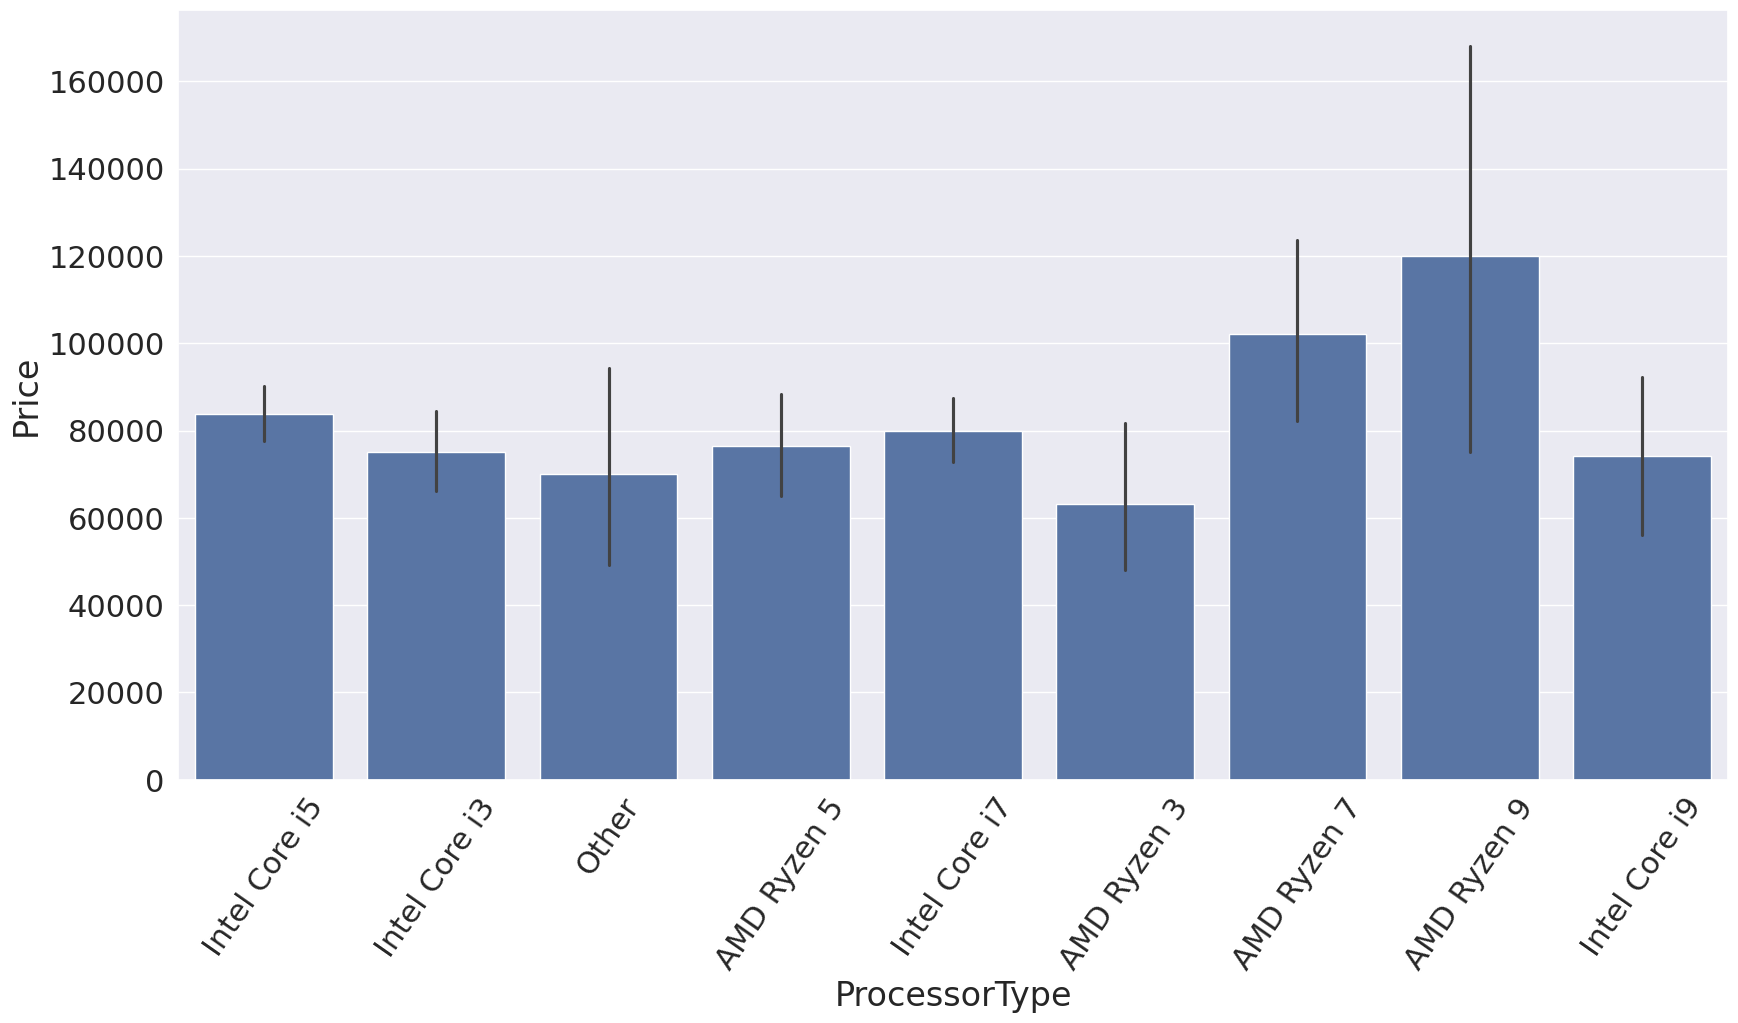

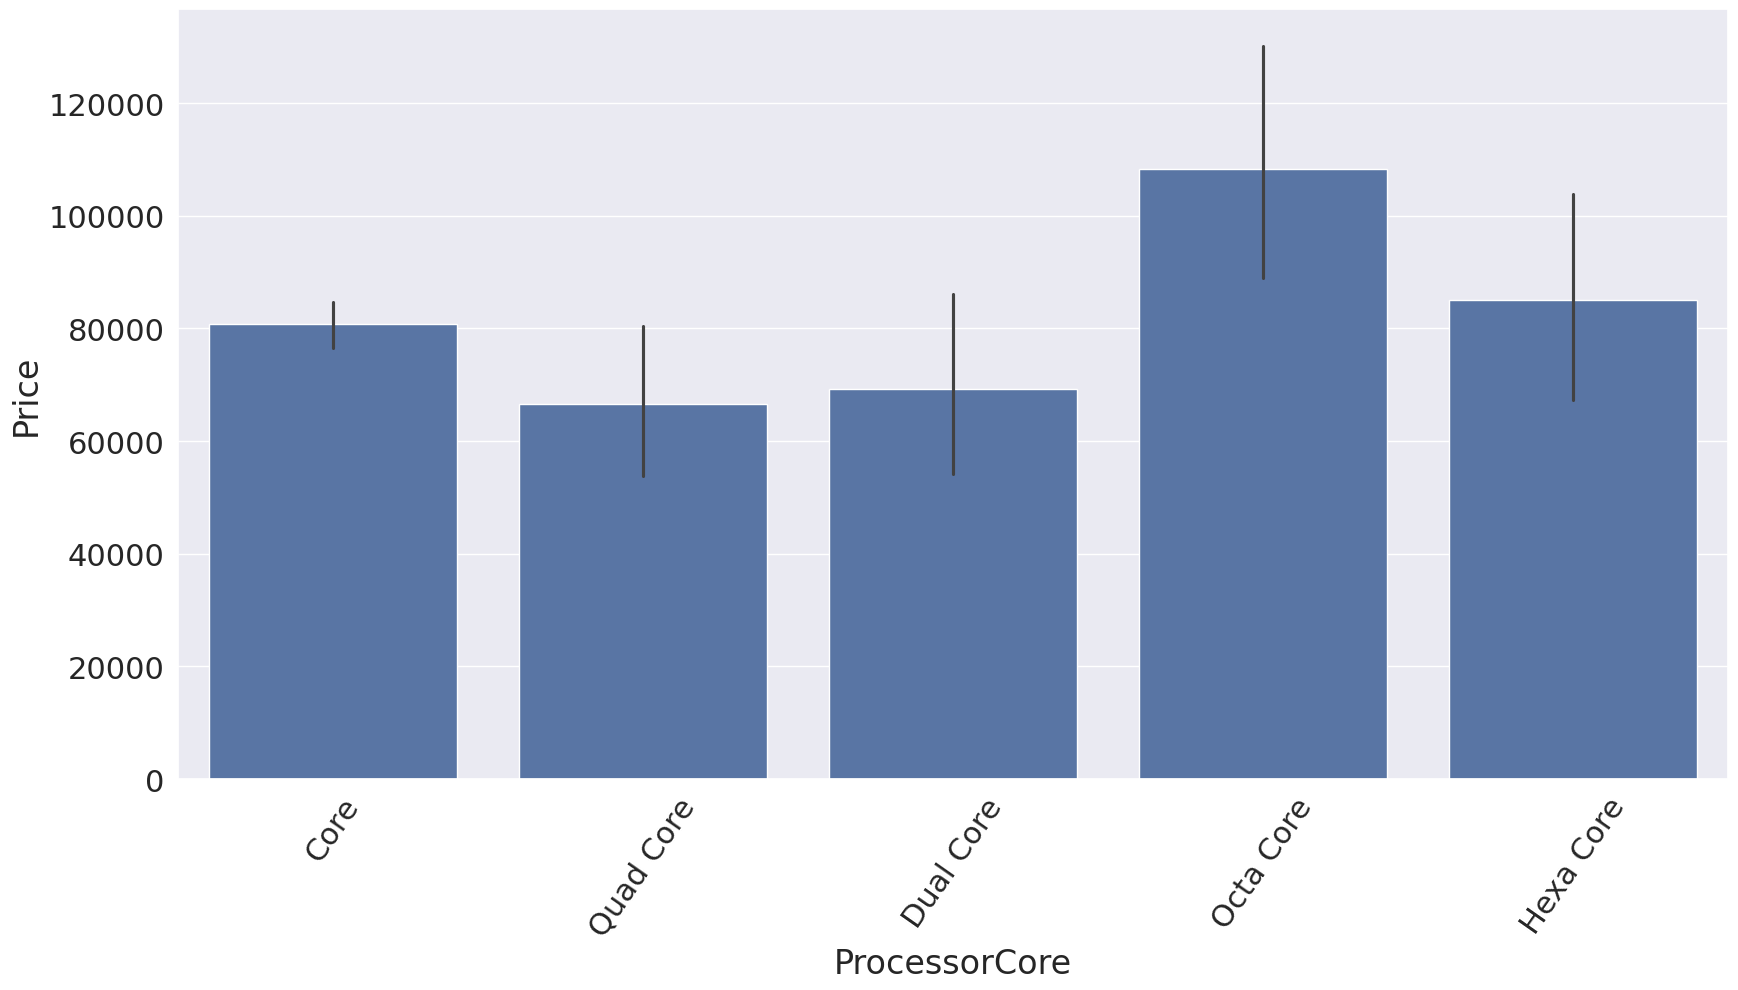

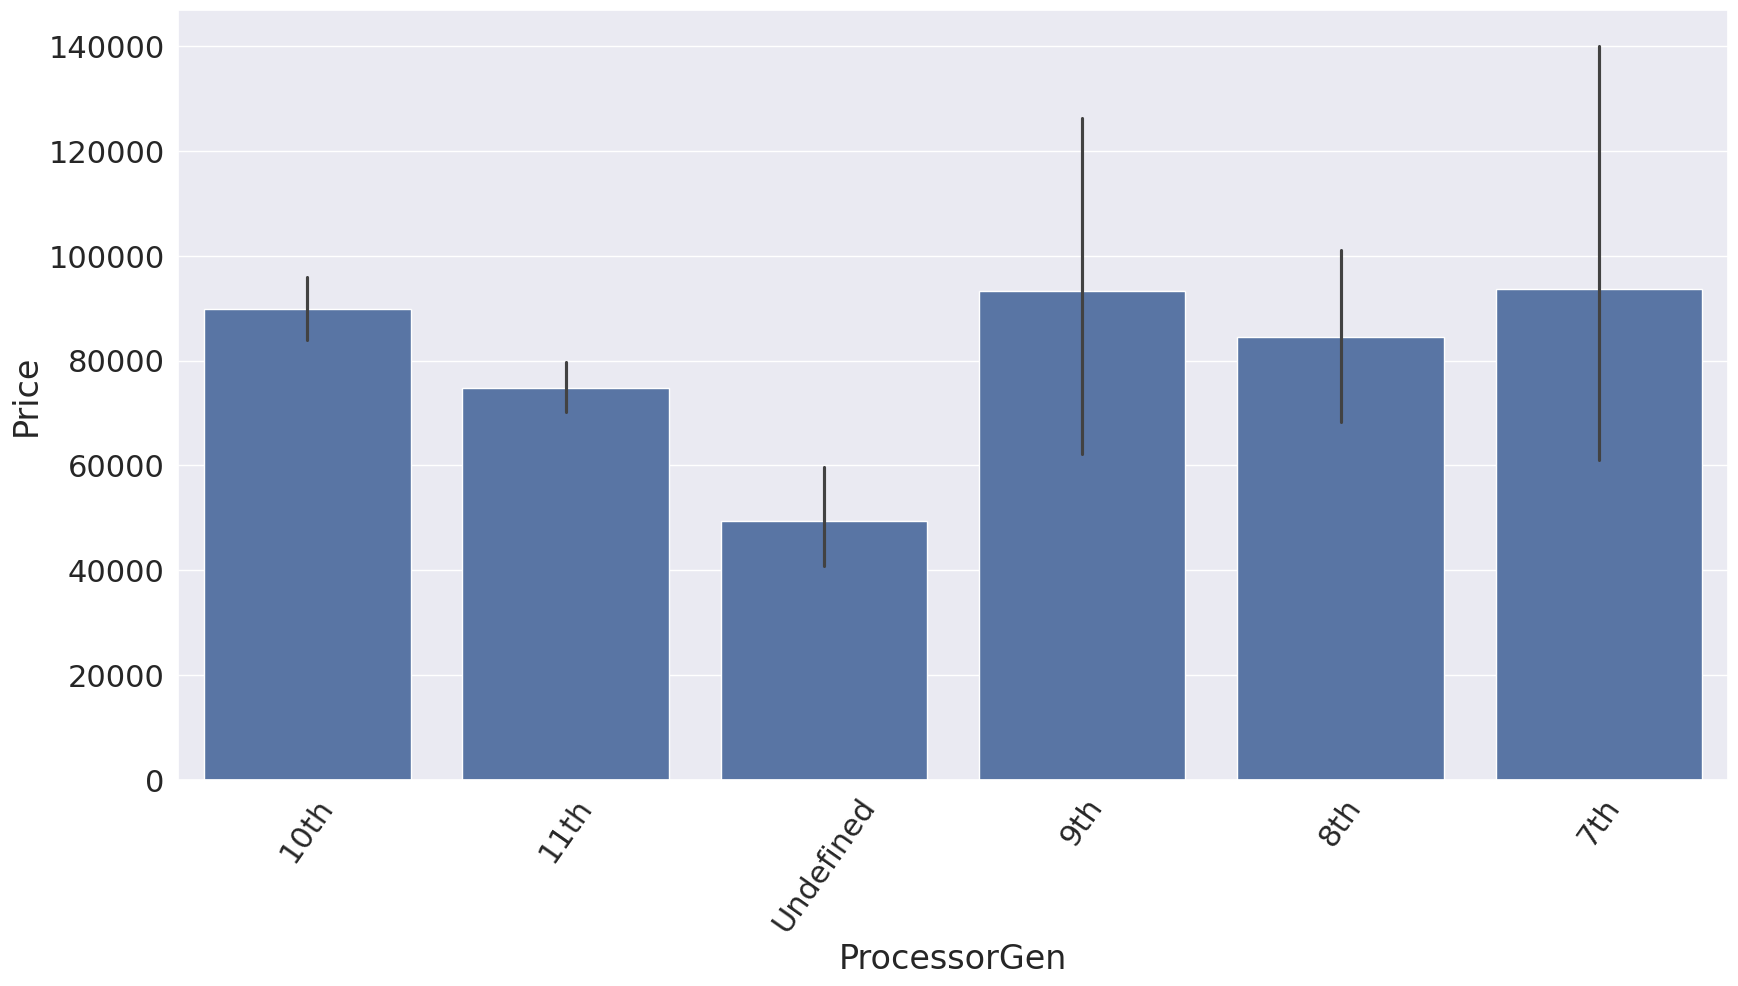

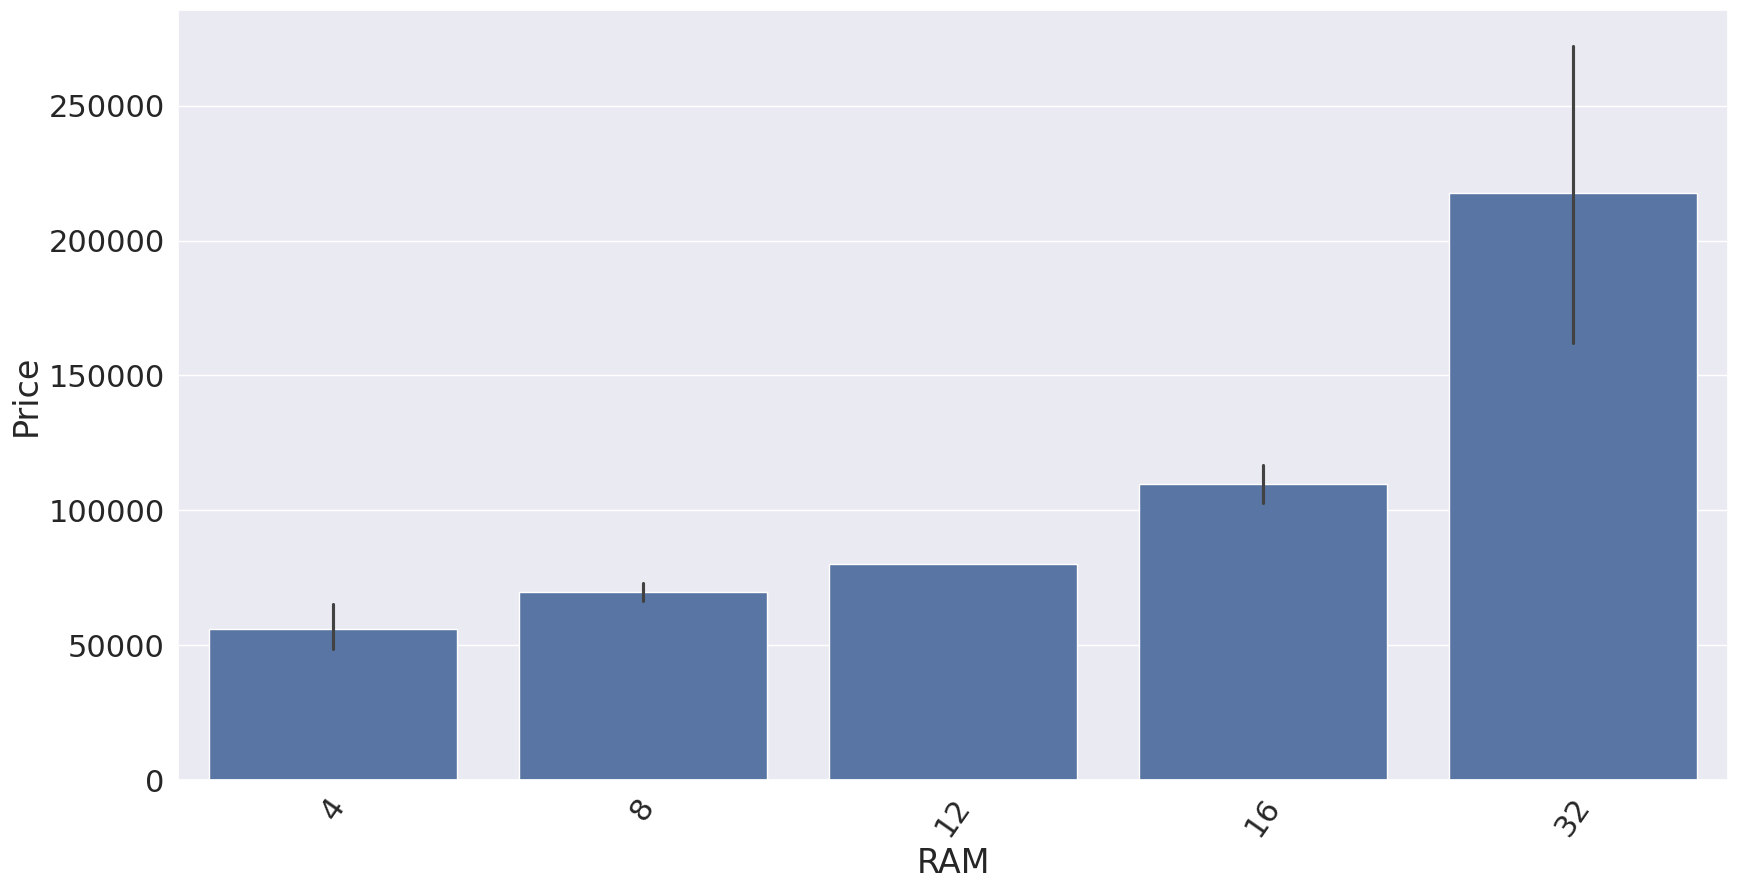

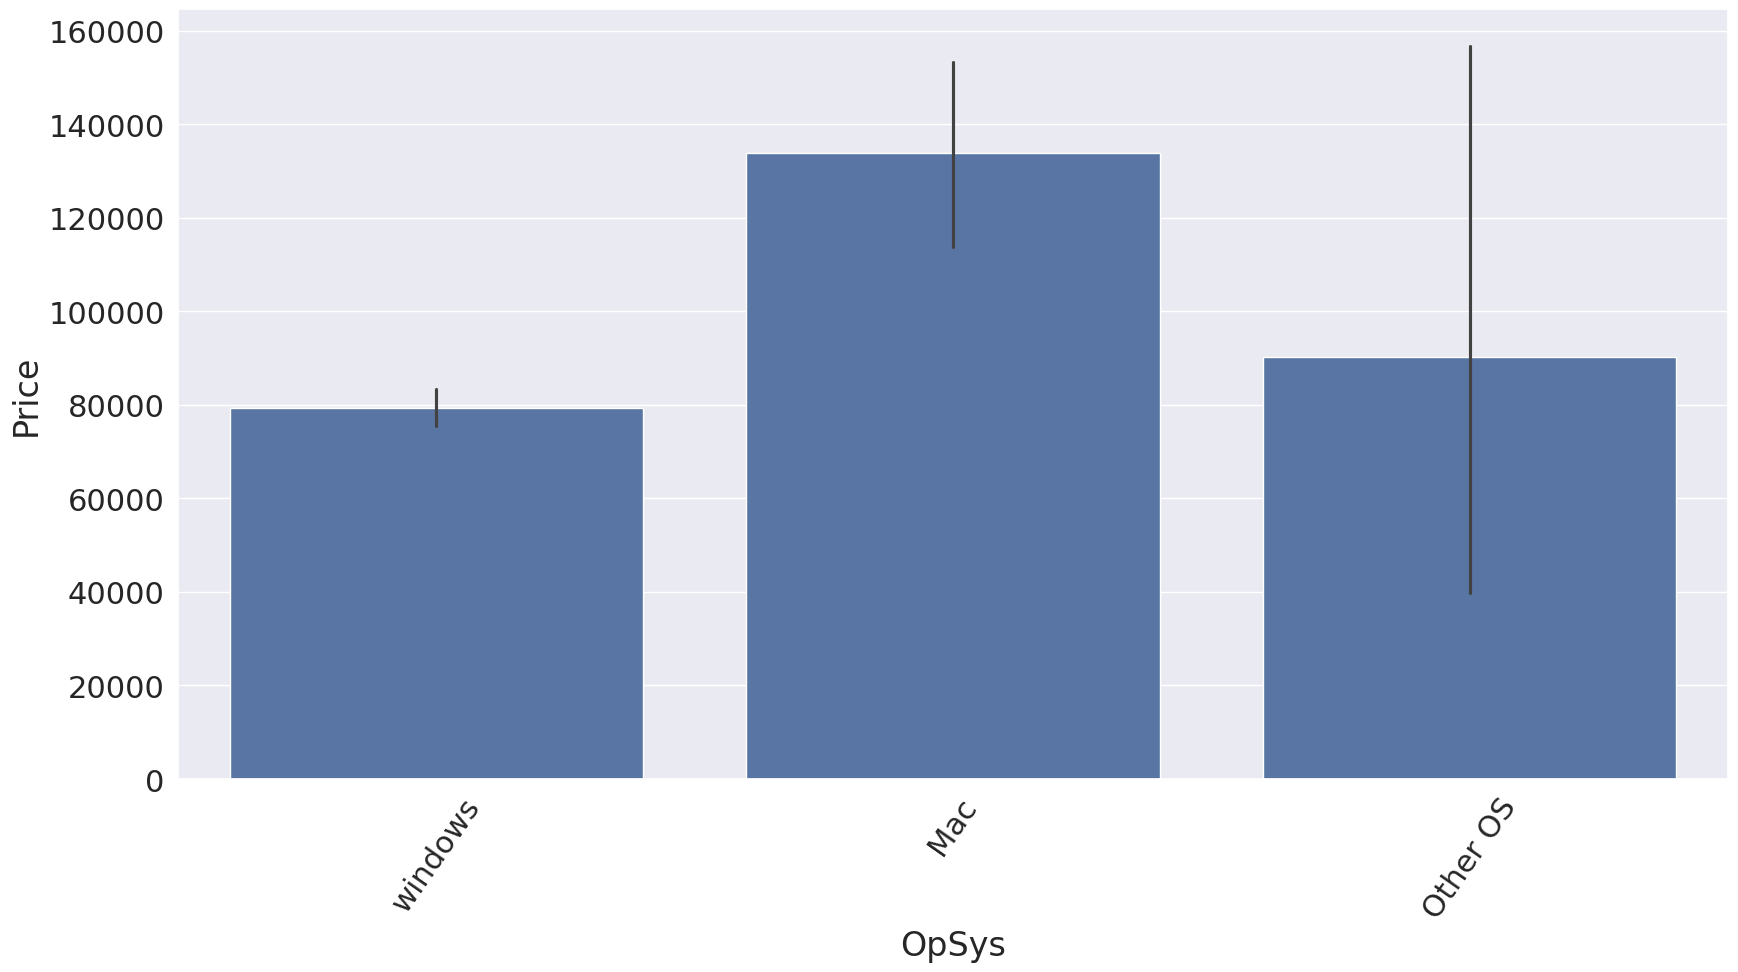

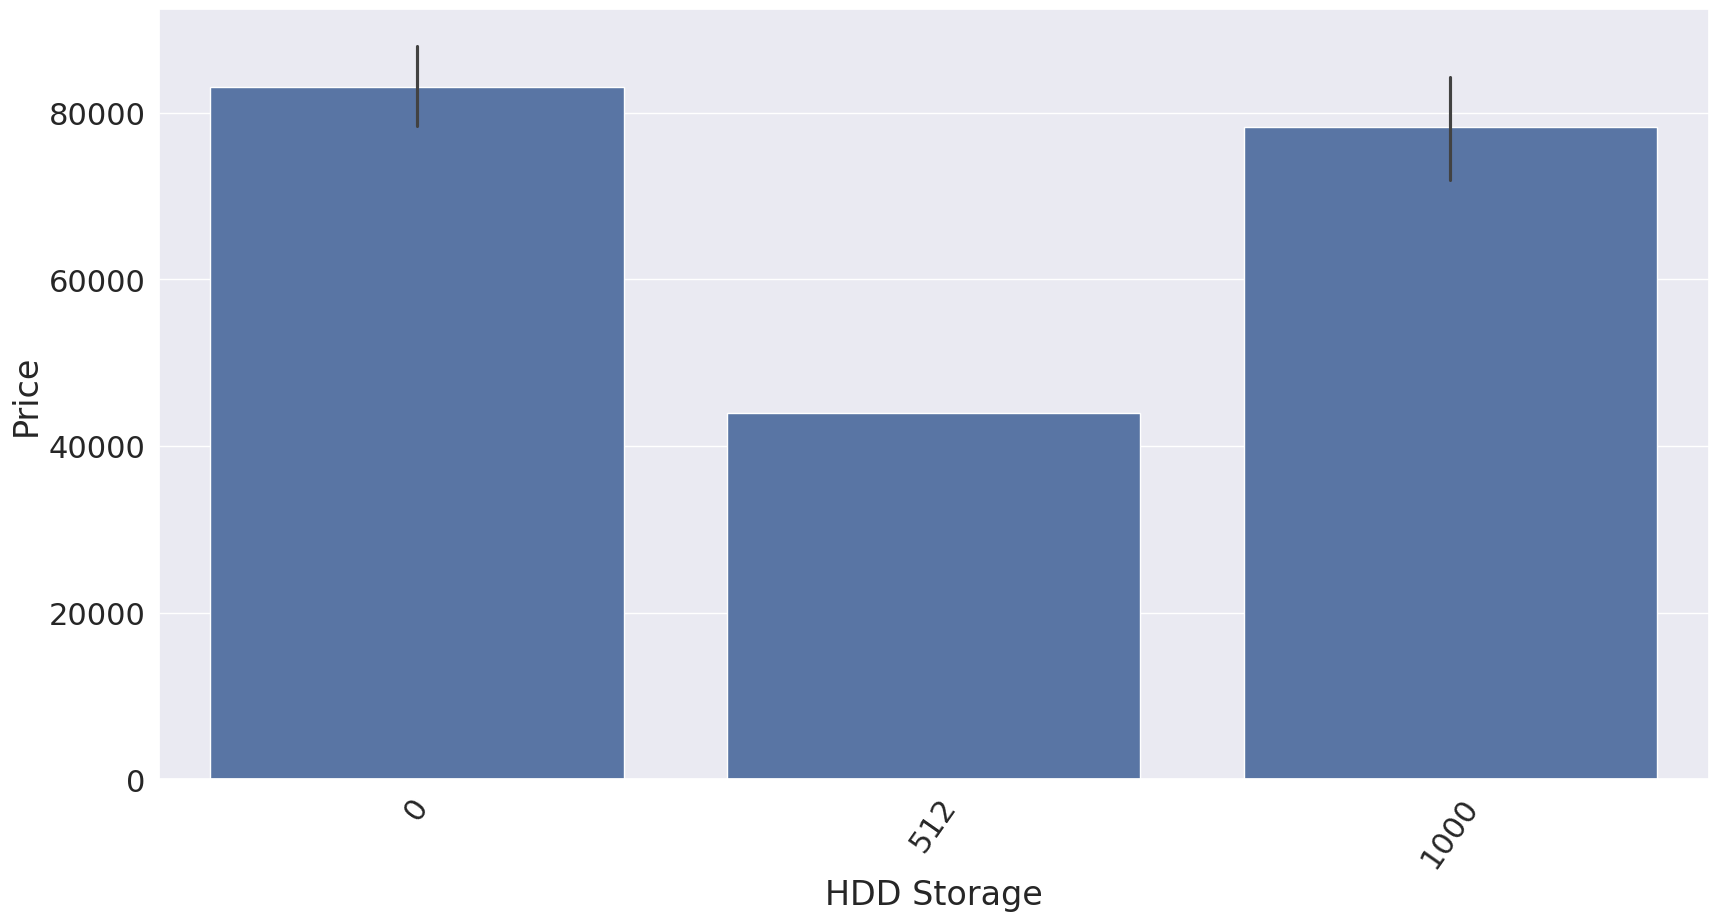

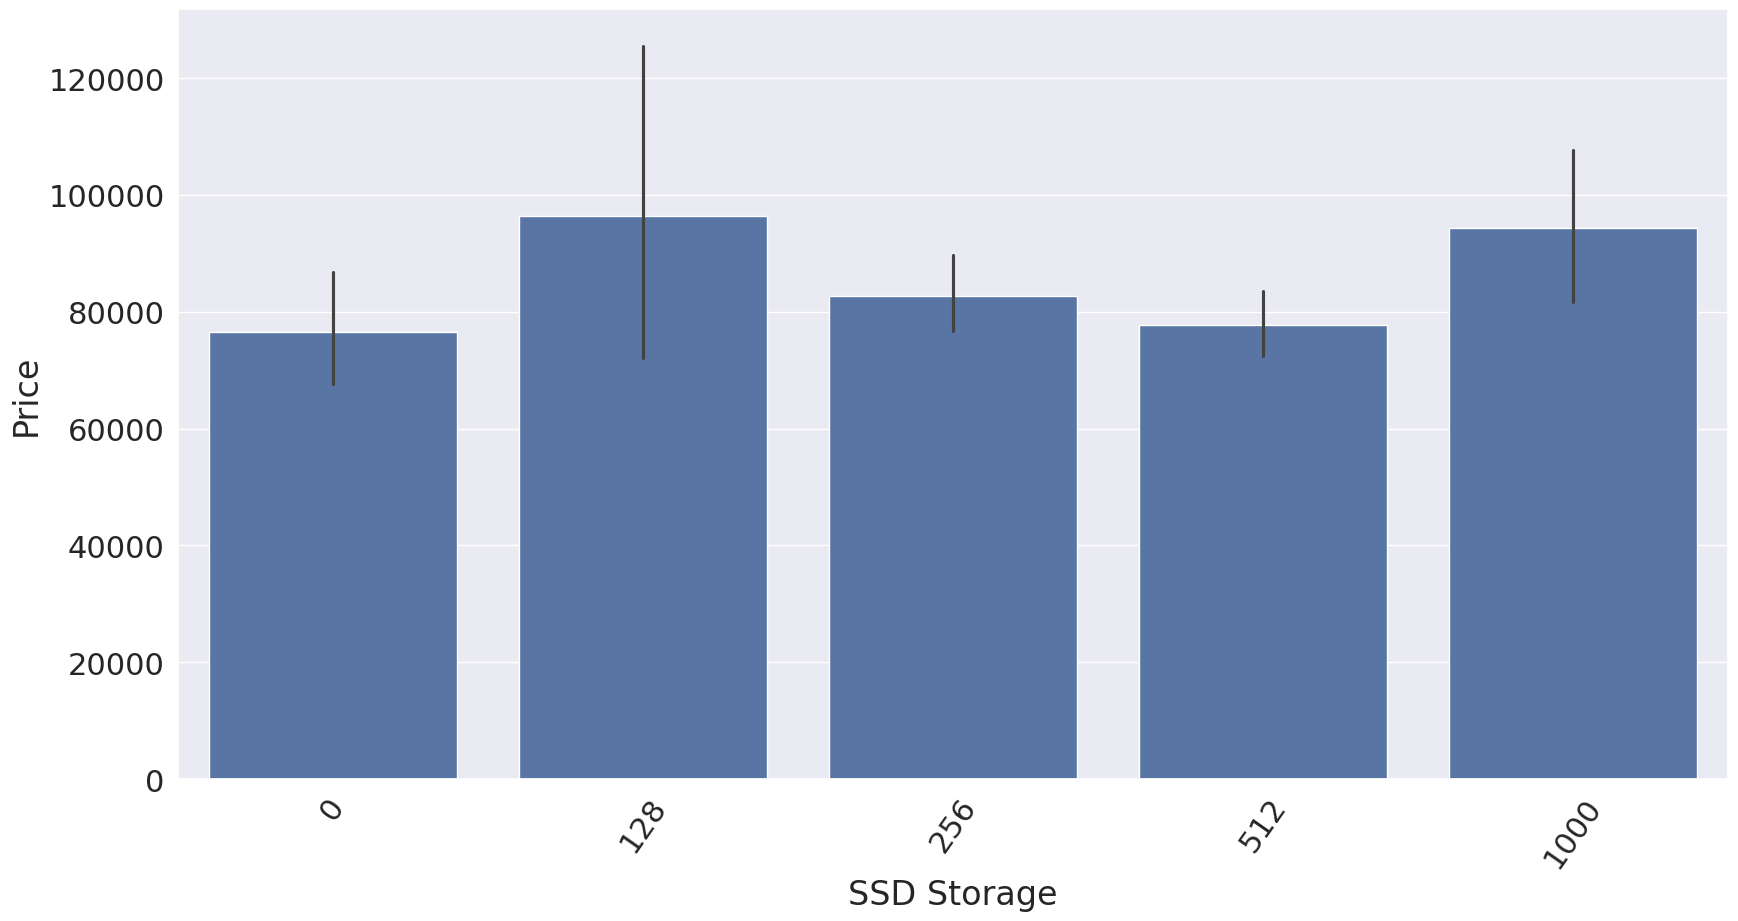

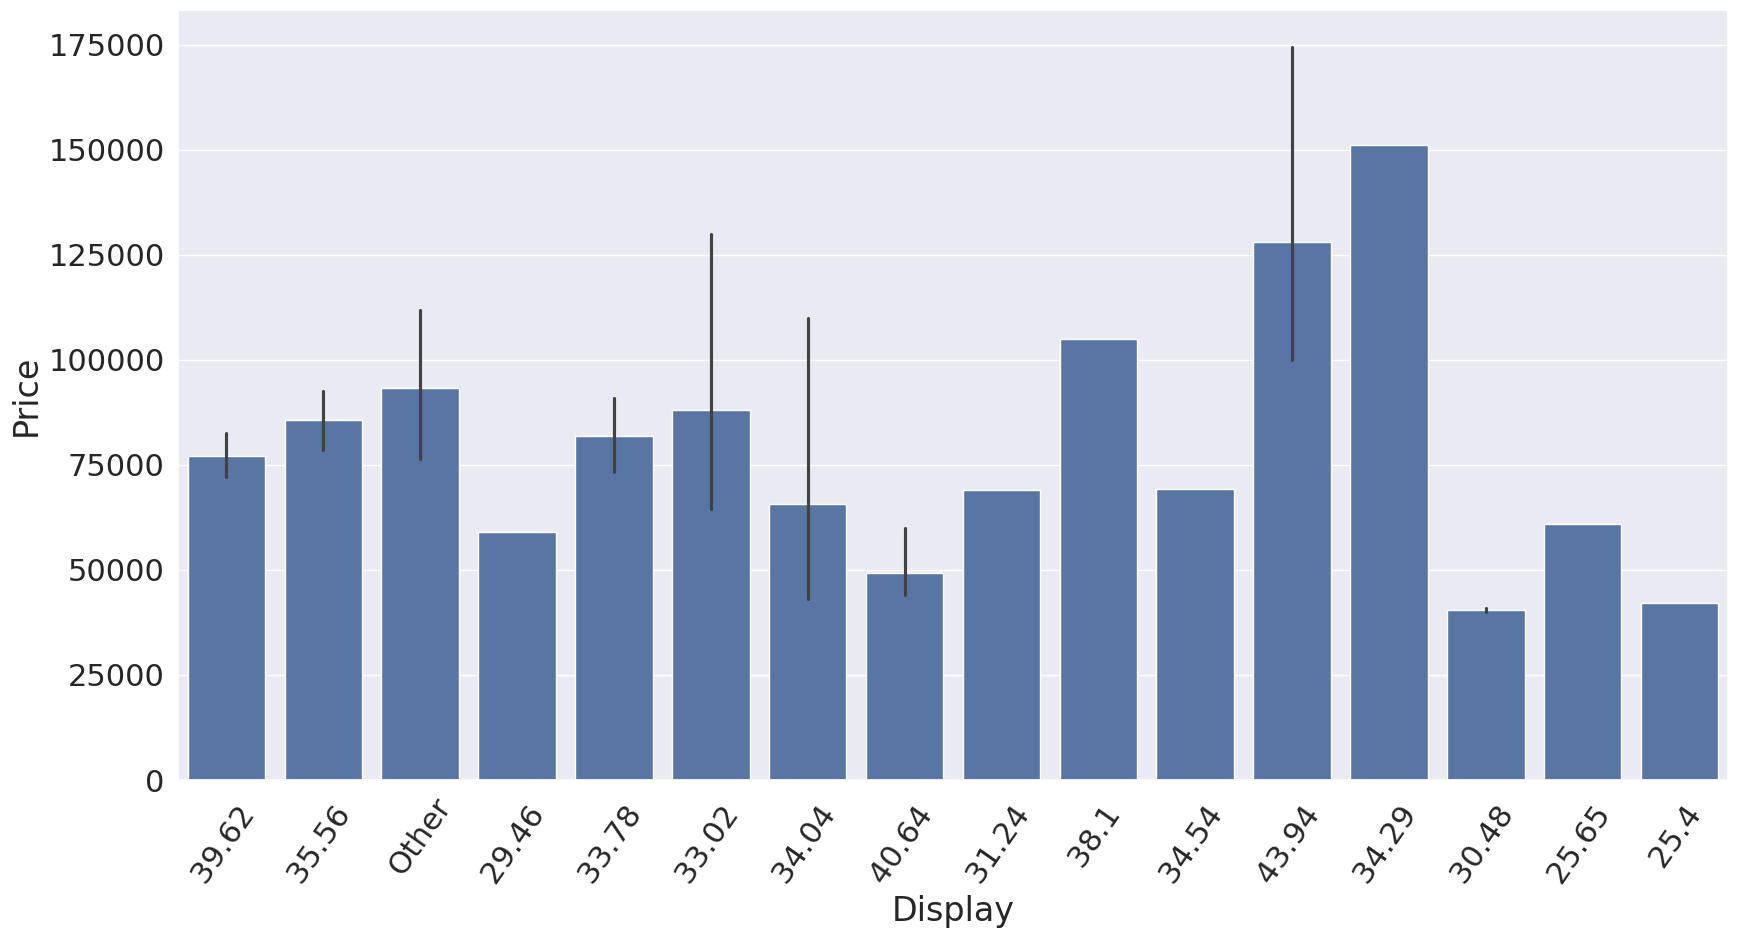

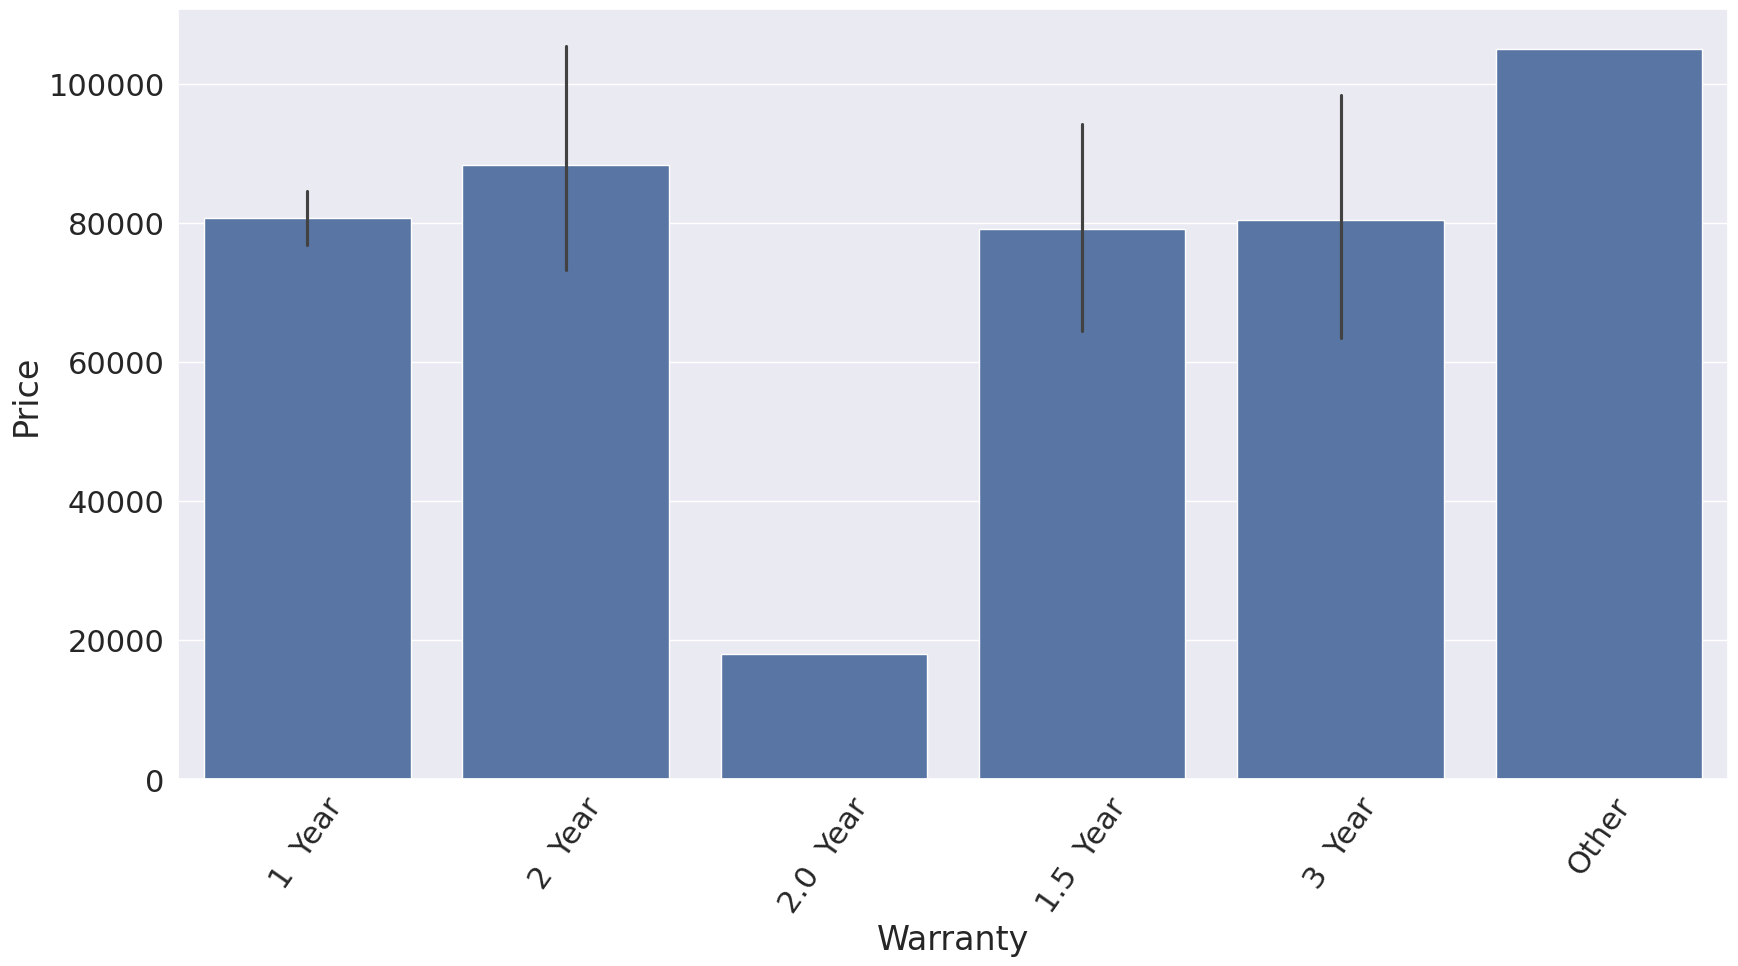

In [47]:
'''
    How the laptop price varies? To answer this question, will be adopted the
    following approach:
        - For all the attributes, excepting the 'Rating, it will be used the
          bar plot to ilustrate this variation;
        - for the 'Rating' entries will be used a strip plot. Prior to this
          step, for the other numeric attributes will be used the scatter plot.
    '''
brplt_vars = ['Brand']+list(df_ltp.columns)[2:-2]

for j in brplt_vars:
    plt.figure()
    sns.set(rc = {'figure.figsize':(20,10)}, font_scale = 2)
    sns.barplot(x = df_ltp[j], y = df_ltp['Price'])
    plt.xticks(rotation = 55)
    #plt.savefig ('{0}_barplot.png'.format(j))
    plt.show()

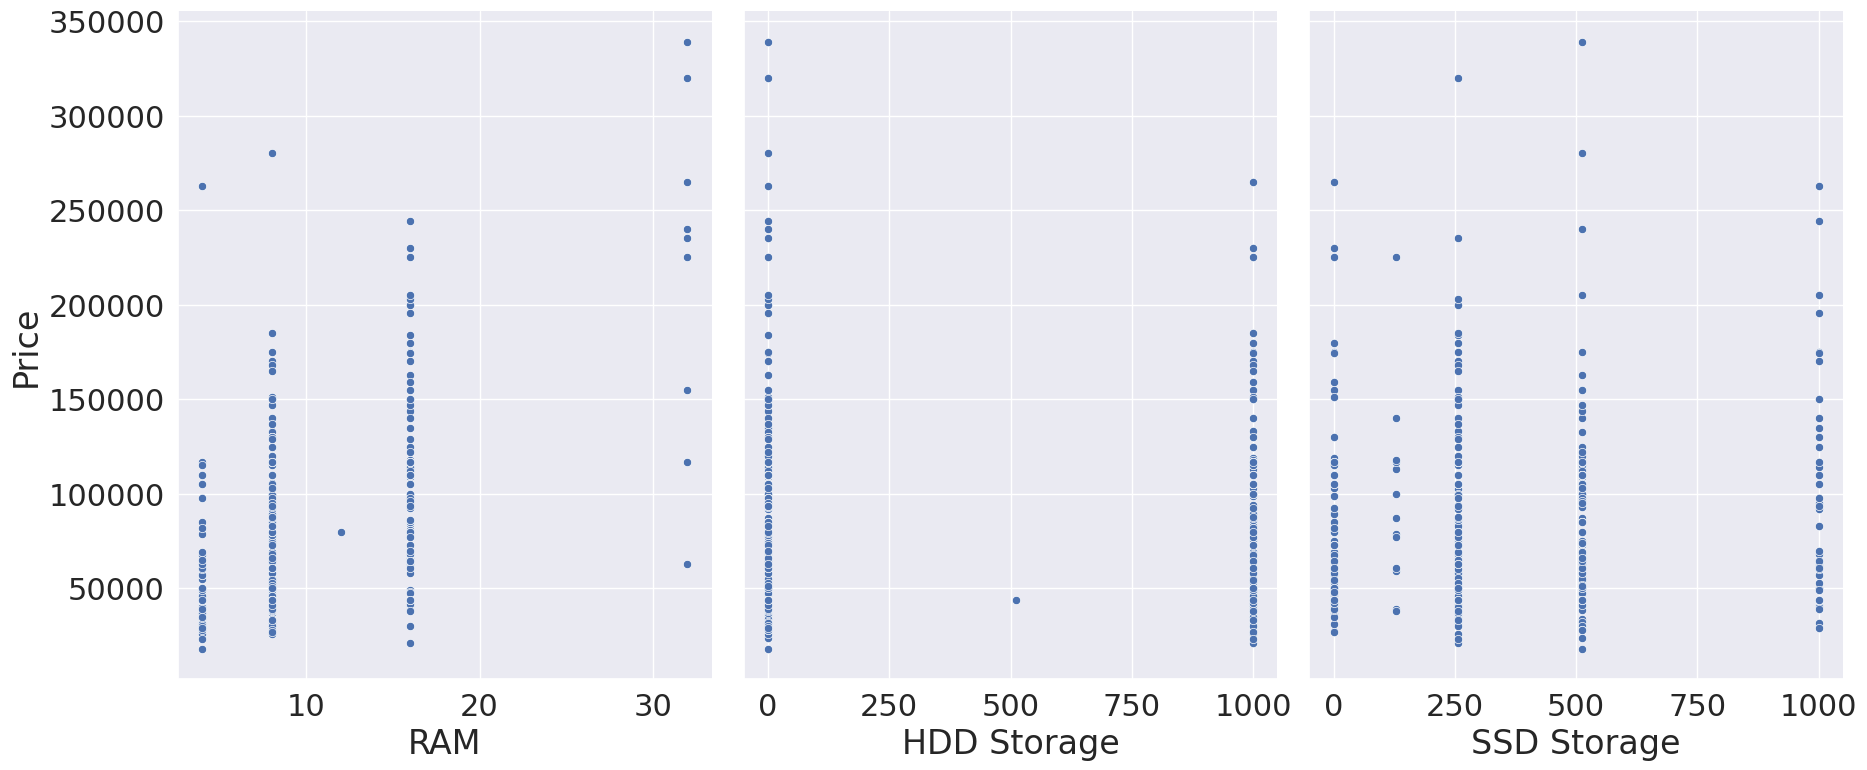

In [48]:
sns.pairplot(df_ltp, x_vars = numeric_vls[:3],
            y_vars = ['Price'], height = 8, aspect = .8, kind = 'scatter')
#plt.savefig("scatterplot.png")
plt.show()

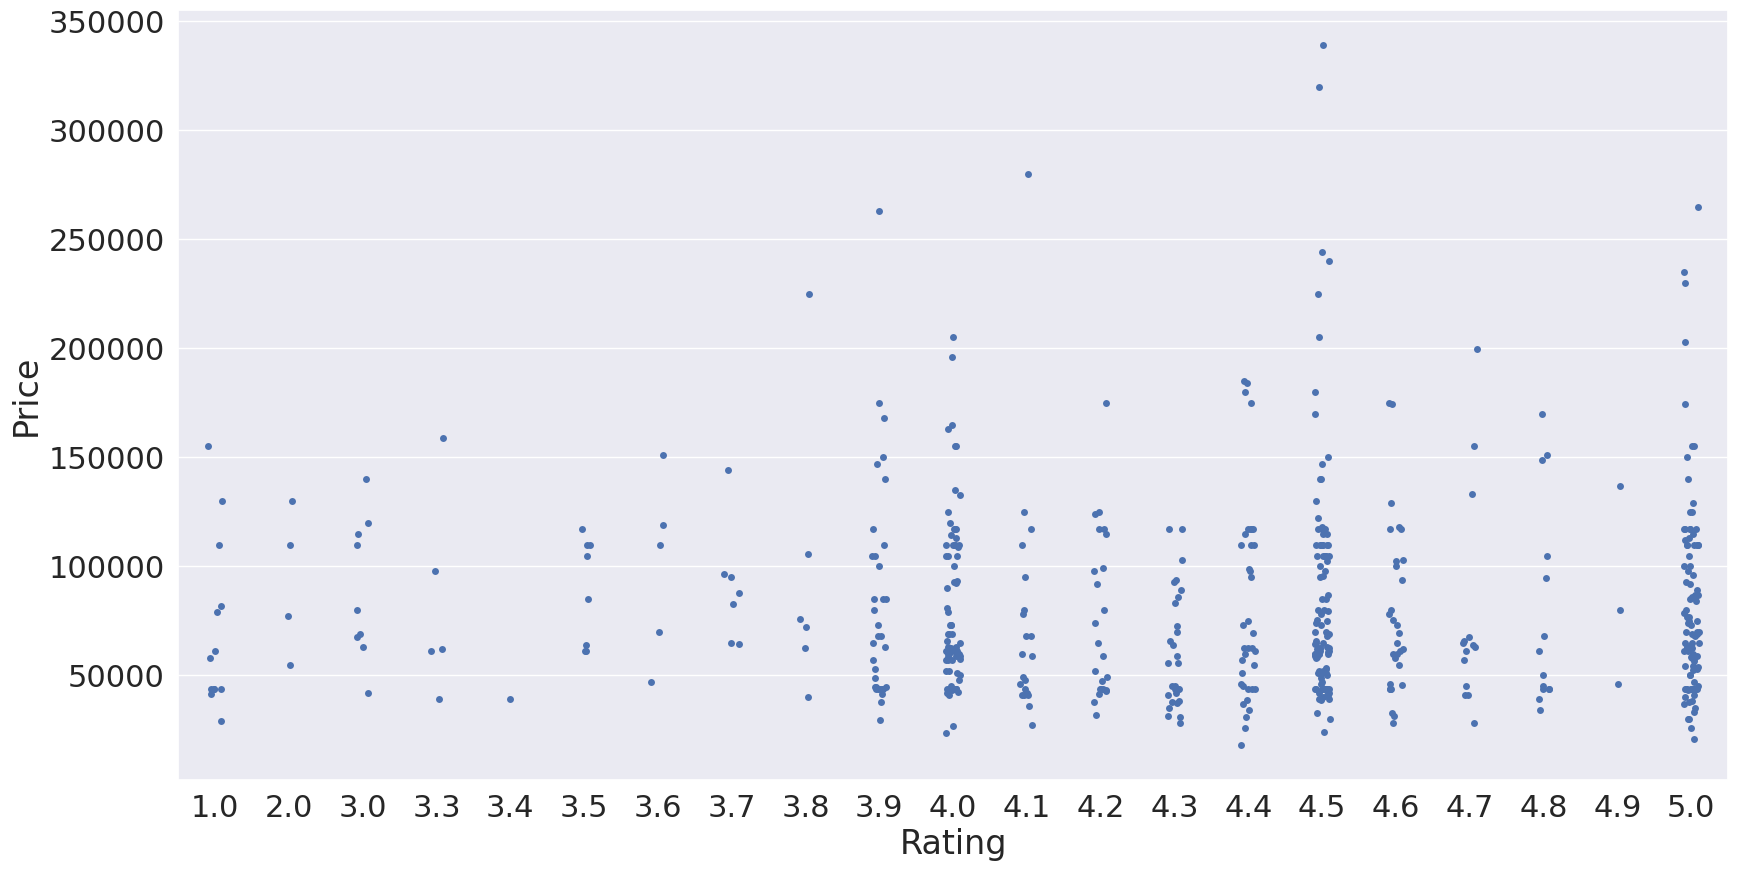

In [49]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale= 2)
sns.stripplot(x='Rating', y='Price', data=df_ltp)
#plt.savefig("Rating_stripplot.png")
plt.show()

In [ ]:
""" LAPTOP PRICE PREDICTION MODEL """

'''
    To build the ML model it is vital to first encode the categorical entries.
    Then, we'll normalize, scale and reduce the dimensionality of these
    attributes.

    We next create a function to apply Robust Scaler and RFE (only for Ridge,
    XGB and Linear Regression, since Lasso eliminates features as part of its
    regularization procedure). We train and fit the model with this same
    function. The outcome is a tuple containing the metrics of each model (MSE
    and R2) and the predicted model itself.
'''

colname=[]
for x in df_ltp.columns:
    if df_ltp[x].dtype=='object':
        colname.append(x)
colname

['Brand',
 'Product',
 'ProcessorType',
 'ProcessorCore',
 'ProcessorGen',
 'OpSys',
 'Display',
 'Warranty']

In [50]:
df_ltp["Display"].unique()

array(['39.62 ', '35.56 ', 'Other', '29.46 ', '33.78 ', '33.02 ',
       '34.04 ', '40.64 ', '31.24 ', '38.1 ', '34.54 ', '43.94 ',
       '34.29 ', '30.48 ', '25.65 ', '25.4 '], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_brand = LabelEncoder()
label_encoder_product = LabelEncoder()
label_encoder_processortype = LabelEncoder()
label_encoder_processorcore = LabelEncoder()
label_encoder_processorgen = LabelEncoder()
label_encoder_opsys = LabelEncoder()
label_encoder_display = LabelEncoder()
label_encoder_warranty = LabelEncoder()

In [ ]:
from multiprocessing import process
brand_encoded = label_encoder_brand.fit_transform(df_ltp['Brand'])
processor_encoded = label_encoder_product.fit_transform(df_ltp['Product'])
processortype_encoded = label_encoder_processortype.fit_transform(df_ltp['ProcessorType'])
processorcore_encoded = label_encoder_processorcore.fit_transform(df_ltp['ProcessorCore'])
processorgen_encoded = label_encoder_processorgen.fit_transform(df_ltp['ProcessorGen'])
processoropsys_encoded = label_encoder_opsys.fit_transform(df_ltp['OpSys'])
display_encoded = label_encoder_display.fit_transform(df_ltp['Display'])
warranty_encoded = label_encoder_warranty.fit_transform(df_ltp['Warranty'])


In [51]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoders
label_encoder_brand = LabelEncoder()
label_encoder_product = LabelEncoder()
label_encoder_processortype = LabelEncoder()
label_encoder_processorcore = LabelEncoder()
label_encoder_processorgen = LabelEncoder()
label_encoder_opsys = LabelEncoder()
label_encoder_display = LabelEncoder()
label_encoder_warranty = LabelEncoder()

# Fit and transform the data, assigning back to the DataFrame
df_ltp['Brand'] = label_encoder_brand.fit_transform(df_ltp['Brand'])
df_ltp['Product'] = label_encoder_product.fit_transform(df_ltp['Product'])
df_ltp['ProcessorType'] = label_encoder_processortype.fit_transform(df_ltp['ProcessorType'])
df_ltp['ProcessorCore'] = label_encoder_processorcore.fit_transform(df_ltp['ProcessorCore'])
df_ltp['ProcessorGen'] = label_encoder_processorgen.fit_transform(df_ltp['ProcessorGen'])
df_ltp['OpSys'] = label_encoder_opsys.fit_transform(df_ltp['OpSys'])
df_ltp['Display'] = label_encoder_display.fit_transform(df_ltp['Display'])
df_ltp['Warranty'] = label_encoder_warranty.fit_transform(df_ltp['Warranty'])

# Verify the encoded columns
print(df_ltp.head())


   Brand  Product  ProcessorType  ProcessorCore  ProcessorGen  RAM  OpSys  \
0      7       98              5              0             0    8      2   
1      7       82              4              0             1    8      2   
2      5      138              8              4             5    8      2   
3      5        2              4              0             1    8      2   
4      5        7              8              1             5    4      2   

   HDD Storage  SSD Storage  Display  Warranty  Rating    Price  
0         1000            0       12         0     3.9  43990.0  
1            0          256       10         0     4.2  43990.0  
2            0          256       10         0     4.6  31490.0  
3            0          256       10         0     4.1  40990.0  
4         1000            0       12         0     4.1  27490.0  


In [52]:
# Save the encoders
import joblib
joblib.dump(label_encoder_brand, 'label_encoder_brand.pkl')
joblib.dump(label_encoder_product, 'label_encoder_product.pkl')
joblib.dump(label_encoder_processortype, 'label_encoder_processortype.pkl')
joblib.dump(label_encoder_processorcore, 'label_encoder_processorcore.pkl')
joblib.dump(label_encoder_processorgen, 'label_encoder_processorgen.pkl')
joblib.dump(label_encoder_opsys, 'label_encoder_opsys.pkl')
joblib.dump(label_encoder_display, 'label_encoder_display.pkl')
joblib.dump(label_encoder_warranty, 'label_encoder_warranty.pkl')

['label_encoder_warranty.pkl']

In [53]:
df_ltp.dtypes

,0
Brand,int64
Product,int64
ProcessorType,int64
ProcessorCore,int64
ProcessorGen,int64
RAM,int64
OpSys,int64
HDD Storage,int64
SSD Storage,int64
Display,int64


In [54]:
y=df_ltp['Price']
X=df_ltp.drop(columns=['Price'])

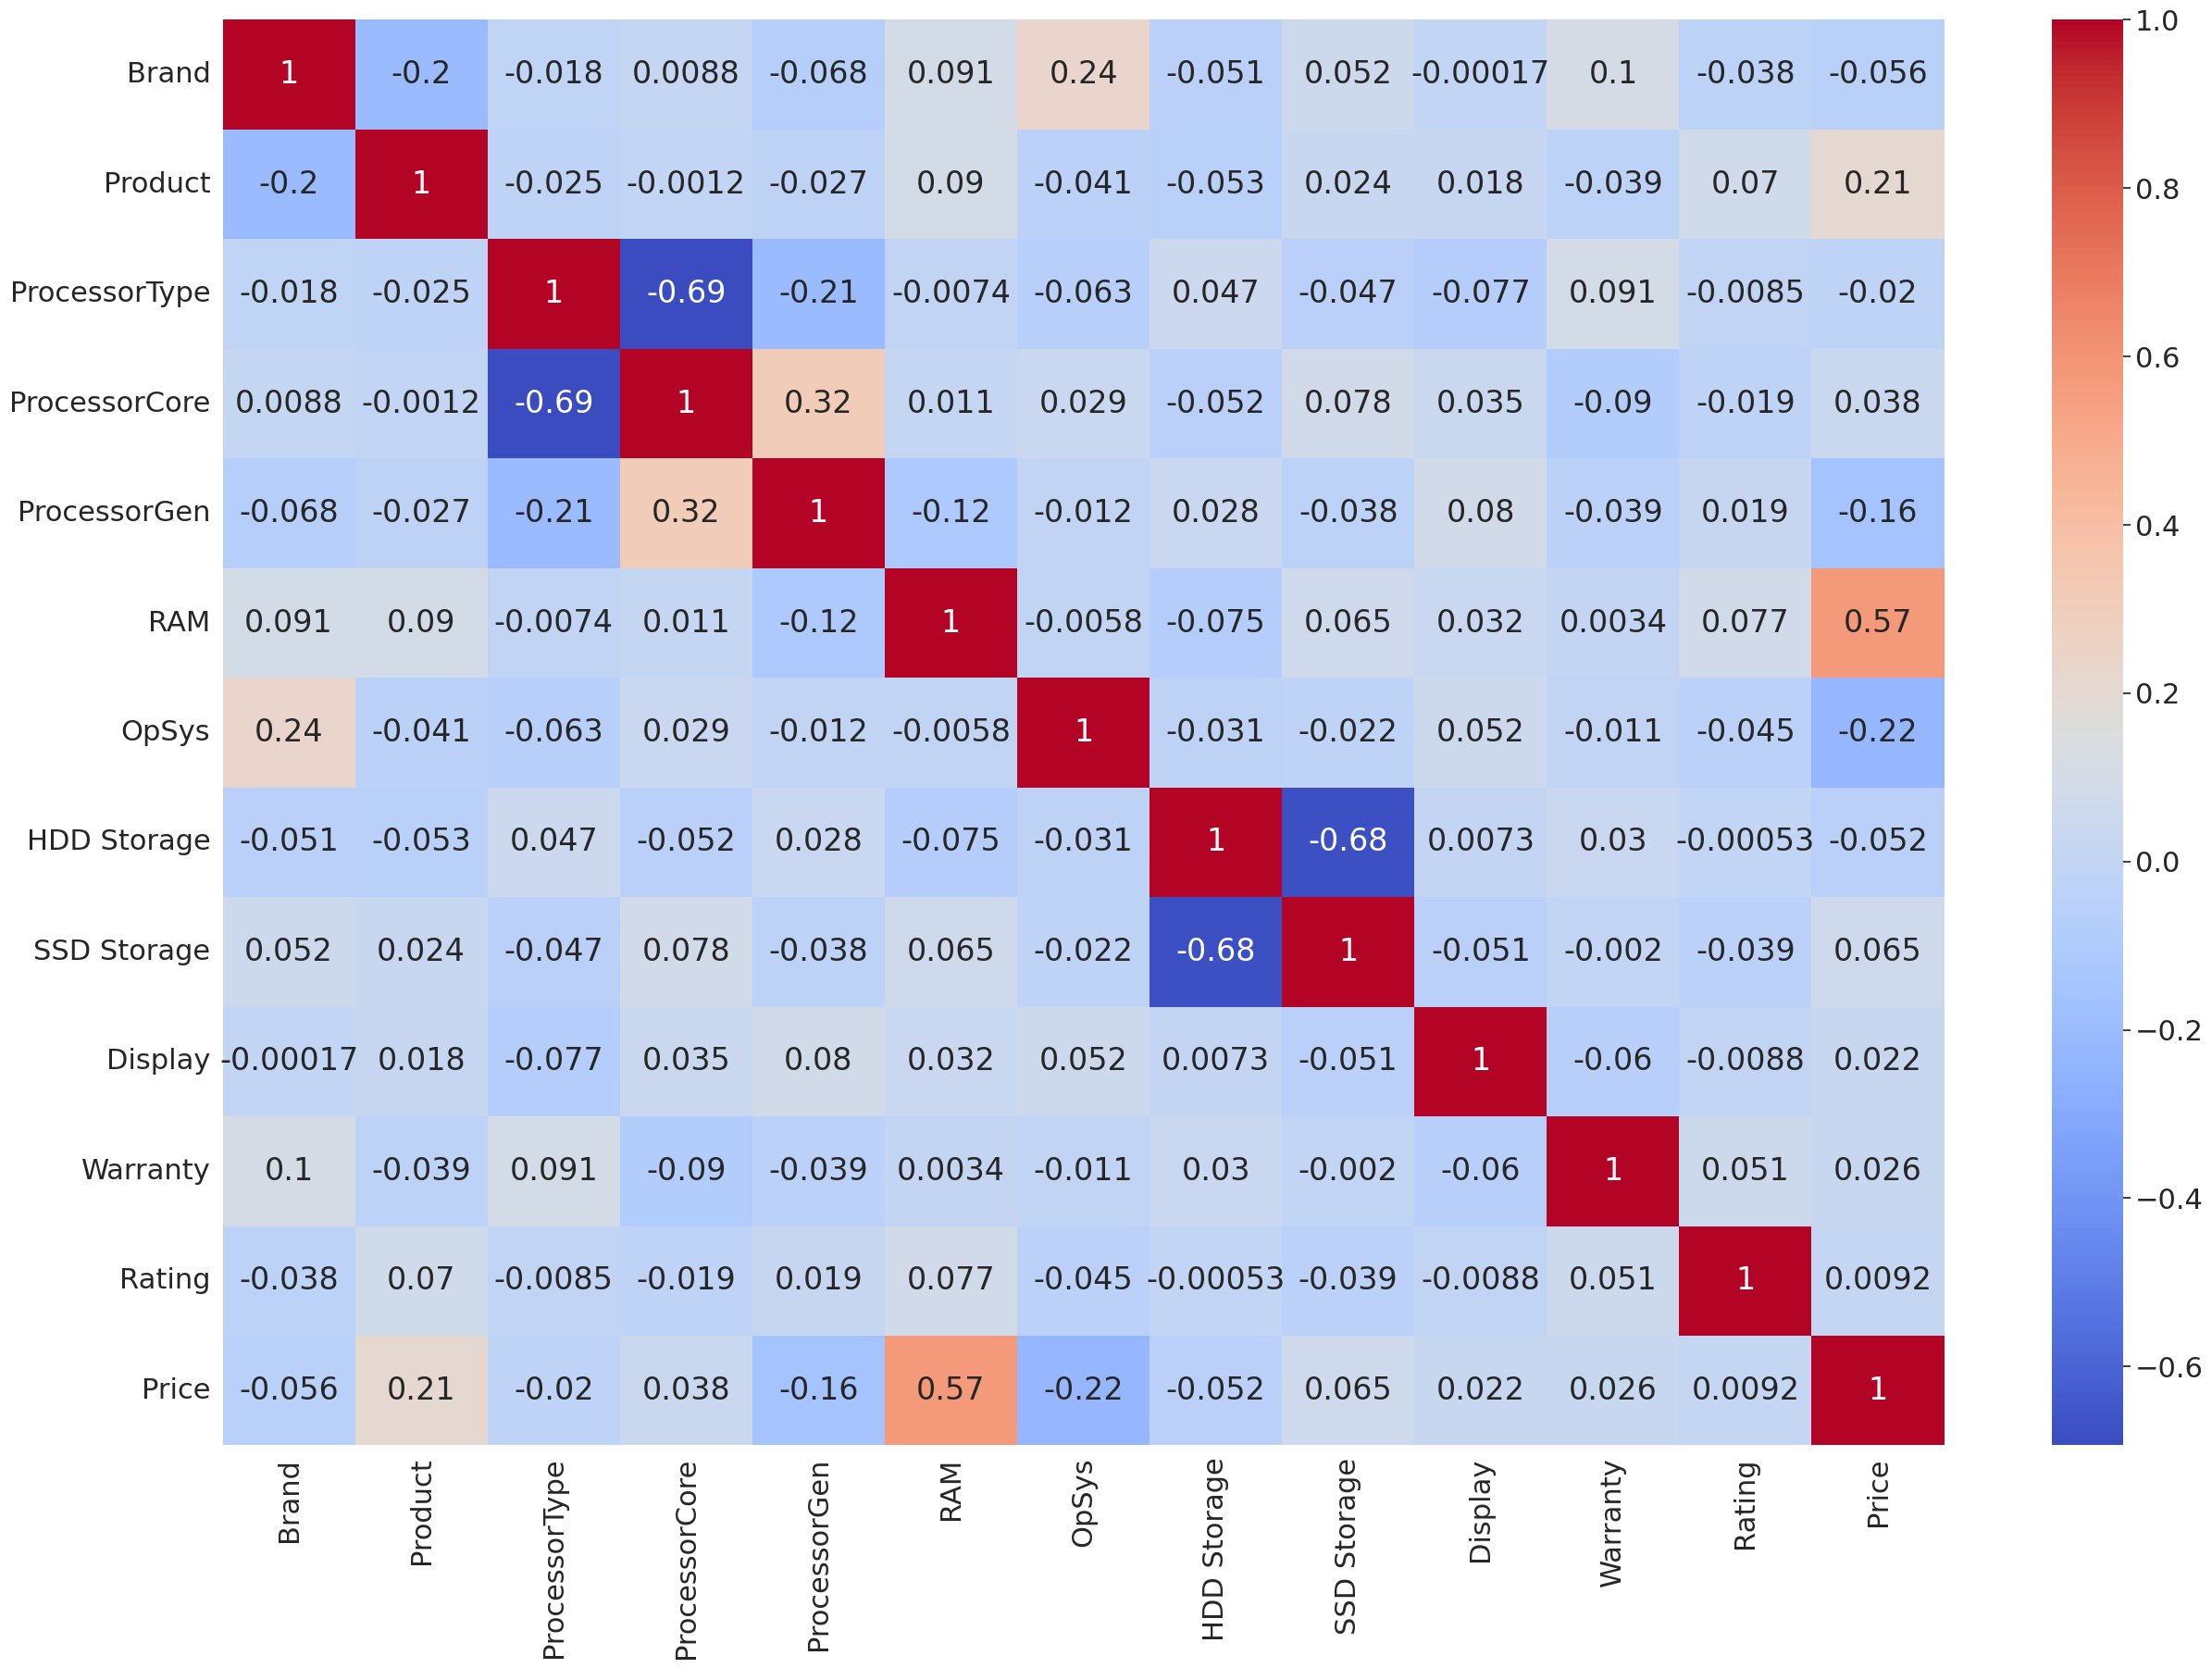

In [55]:
plt.figure(figsize=(30,20))
cr=df_ltp.corr()
sns.heatmap(cr,cmap='coolwarm',annot=True)
plt.show()

In [56]:
X.columns

Index(['Brand', 'Product', 'ProcessorType', 'ProcessorCore', 'ProcessorGen',
       'RAM', 'OpSys', 'HDD Storage', 'SSD Storage', 'Display', 'Warranty',
       'Rating'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(f'The MSE with Lin Reg is,{mse}')
r2=r2_score(y_test,y_pred)
print(f'The R^2 with Lin Reg is,{r2}')

The MSE with Lin Reg is,1040919074.9303962
The R^2 with Lin Reg is,0.37527172738502756


In [59]:
print("Training:",lr.score(X_train,y_train))  # Training Score
print("Testing:",lr.score(X_test,y_test))

Training: 0.41785869447071444
Testing: 0.37527172738502756


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: -0.06304397376938708
Mean Squared Error: 1771238470.0545454
Root Mean Squared Error: 42086.08404276342


In [61]:
print("Training:",model.score(X_train,y_train))  # Training Score
print("Testing:",model.score(X_test,y_test))

Training: 1.0
Testing: -0.06304397376938708


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred = model_rf.predict(X_test)

# Calculate accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.236157943292571
Mean Squared Error: 1272709755.44732
Root Mean Squared Error: 35675.057889894444


In [63]:
print("Training:",model_rf.score(X_train,y_train))  # Training Score
print("Testing:",model_rf.score(X_test,y_test))

Training: 0.9304900695679853
Testing: 0.236157943292571


In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt # Import sqrt for RMSE calculation

model_XGBoost=XGBRegressor(n_estimators=7000,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,y_train)

# Pass X_test (features) to predict, not y_test (target)
y_pred=model_XGBoost.predict(X_test)

# Calculate accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.4033151064464302
Mean Squared Error: 994193339.1663798
Root Mean Squared Error: 31530.83156477767


In [65]:
print("Training:",model_XGBoost.score(X_train,y_train))  # Training Score
print("Testing:",model_XGBoost.score(X_test,y_test))

Training: 0.9999999999985674
Testing: 0.4033151064464302


In [66]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Initialize Ridge Regression model
model_ridge = Ridge()  # You can adjust the alpha (regularization strength)

# Fit the model to training data
model_ridge.fit(X_train, y_train)

# Make predictions on test data
y_pred = model_ridge.predict(X_test)

# Calculate accuracy metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.37558922591360366
Mean Squared Error: 1040390060.4946097
Root Mean Squared Error: 32255.07805748747


In [67]:
print("Training:",model_ridge.score(X_train,y_train))  # Training Score
print("Testing:",model_ridge.score(X_test,y_test))

Training: 0.4178461983325269
Testing: 0.37558922591360366


In [68]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Initialize Lasso Regression model
model_lasso = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)

# Fit the model to training data
model_lasso.fit(X_train, y_train)

# Make predictions on test data
y_pred = model_lasso.predict(X_test)

# Calculate accuracy metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.3752826761437156
Mean Squared Error: 1040900832.1642773
Root Mean Squared Error: 32262.99477984456


In [69]:
print("Training:",model_lasso.score(X_train,y_train))  # Training Score
print("Testing:",model_lasso.score(X_test,y_test))

Training: 0.4178586866287969
Testing: 0.3752826761437156


In [70]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=7000, random_state=10)
}

# Evaluate each model and store results in a list of dictionaries
results_list = []
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)

    # Store results for this model
    results_list.append({"Model": name, "R2 Score": r2, "Adjusted R2": adj_r2, "MSE": mse, "RMSE": rmse})

# Create a DataFrame from the results list
df_results = pd.DataFrame(results_list)
print(df_results)

               Model  R2 Score  Adjusted R2           MSE          RMSE
0  Linear Regression  0.375272     0.297986  1.040919e+09  32263.277498
1              Ridge  0.375589     0.298343  1.040390e+09  32255.078057
2              Lasso  0.375283     0.297998  1.040901e+09  32262.994780
3      Decision Tree -0.063044    -0.194555  1.771238e+09  42086.084043
4      Random Forest  0.236158     0.141662  1.272710e+09  35675.057890
5            XGBoost  0.403315     0.329498  9.941933e+08  31530.831565


In [71]:
''' SAVING THE MODEL '''

jbl.dump(model_XGBoost,"LaptopPriceModel.sav")

['LaptopPriceModel.sav']

In [72]:
import gradio as gr
import joblib
import numpy as np

# Load the saved LabelEncoders
label_encoder_brand = joblib.load('label_encoder_brand.pkl')
label_encoder_product = joblib.load('label_encoder_product.pkl')
label_encoder_processortype = joblib.load('label_encoder_processortype.pkl')
label_encoder_processorcore = joblib.load('label_encoder_processorcore.pkl')
label_encoder_processorgen = joblib.load('label_encoder_processorgen.pkl')
label_encoder_opsys = joblib.load('label_encoder_opsys.pkl')
label_encoder_display = joblib.load('label_encoder_display.pkl')
label_encoder_warranty = joblib.load('label_encoder_warranty.pkl')

# Prediction function with debugging
def predict(Brand, Product, ProcessorType, ProcessorCore, ProcessorGen, RAM, Opsys, HDD_Storage, SSD_Storage, Display, Warranty, Rating):
    model = joblib.load('LaptopPriceModel.sav')

    try:
        # Encode the categorical inputs using the saved LabelEncoders
        Brand_encoded = label_encoder_brand.transform([Brand])[0]
        Product_encoded = label_encoder_product.transform([Product])[0]
        ProcessorType_encoded = label_encoder_processortype.transform([ProcessorType])[0]
        ProcessorCore_encoded = label_encoder_processorcore.transform([ProcessorCore])[0]
        ProcessorGen_encoded = label_encoder_processorgen.transform([ProcessorGen])[0]
        Opsys_encoded = label_encoder_opsys.transform([Opsys])[0]
        Display_encoded = label_encoder_display.transform([Display])[0]
        Warranty_encoded = label_encoder_warranty.transform([Warranty])[0]

        # Combine all inputs into a single array
        input_data = np.array([
            Brand_encoded, Product_encoded, ProcessorType_encoded, ProcessorCore_encoded,
            ProcessorGen_encoded, RAM, Opsys_encoded, HDD_Storage,
            SSD_Storage, Display_encoded, Warranty_encoded, Rating
        ]).reshape(1, -1)

        print(f"Input Data Shape: {input_data.shape}")  # Debugging: Check input shape
        print(f"Input Data: {input_data}")  # Debugging: Check input data

        # Predict the price
        outcome = model.predict(input_data)
        return f'The predicted price of the laptop is ${outcome[0]:,.2f}'

    except Exception as e:
        return f"An error occurred: {str(e)}"

# Build the Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Dropdown(label_encoder_brand.classes_.tolist(), label="Brand"),
        gr.Dropdown(label_encoder_product.classes_.tolist(), label="Product"),
        gr.Dropdown(label_encoder_processortype.classes_.tolist(), label="Processor Type"),
        gr.Dropdown(label_encoder_processorcore.classes_.tolist(), label="Processor Core"),
        gr.Dropdown(label_encoder_processorgen.classes_.tolist(), label="Processor Generation"),
        gr.Number(label="RAM (GB)"),
        gr.Dropdown(label_encoder_opsys.classes_.tolist(), label="Operating System"),
        gr.Number(label="HDD Storage (GB)"),
        gr.Number(label="SSD Storage (GB)"),
        gr.Dropdown(label_encoder_display.classes_.tolist(), label="Display Size (inches)"),
        gr.Dropdown(label_encoder_warranty.classes_.tolist(), label="Warranty (years)"),
        gr.Number(label="Rating (out of 5)")
    ],
    outputs=gr.Textbox(label="Predicted Price"),
    title="Laptop Price Predictor",
    description="Predict the price of a laptop based on its specifications."
)

# Launch the Gradio interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://dc8d6e7cdd92ab7e6d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
